# 1. DATA EXPLORATION

## Import libraries

In [775]:
# Pandas help to quickly compute statistics (like mean, median) and explore relationships between features.
import pandas as pd

import pandas as pd
from datetime import datetime, timezone

# Numpy provides support for large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
import numpy as np

# Matplotlib is plotting library in Python. It allows for the creation of static, animated, and interactive visualizations in Python.
# After training a model, visualizing the performance (e.g., confusion matrix, ROC curves, etc.) is often key to understanding how well model generalizes to new data.
import matplotlib.pyplot as plt

# Seaborn is a data visualization library based on Matplotlib that provides a higher-level interface for creating more aesthetically pleasing and 
# informative statistical graphics. Seaborn is highly useful for visualizing distributions, relationships between multiple variables, and drawing 
# attention to the structure within the data (e.g., pair plots, heatmaps, box plots). These plots are often used to explore the relationships between 
# features and the target variable in ML. Understanding correlations between variables is crucial in feature engineering and selection, and Seaborn 
# makes it easy to generate visualizations that reveal these insights. Seaborn is an amazing visualization library for statistical graphics plotting 
# in Python. It provides beautiful default styles and color palettes to make statistical plots more attractive. 
# It is built on top matplotlib library and is also closely integrated with the data structures from pandas.
import seaborn as sns

# PyTorch is an open-source machine learning library primarily developed for deep learning. It provides tools for creating and training neural 
# networks, performing automatic differentiation, and working with tensors. PyTorch offers dynamic computation graphs (i.e., graphs are created on 
# the fly), which are useful for models that change during execution. This flexibility is why many researchers prefer PyTorch over other libraries 
# like TensorFlow. Tensors are the core data structure in PyTorch, similar to NumPy arrays but optimized for GPU acceleration. Using tensors allows 
# for more efficient numerical computations, especially for deep learning tasks.
import torch

# The `TensorDataset` in PyTorch combines input features and labels into a single dataset object, making it easier to manage data. 
# The `DataLoader` is then used to efficiently load and iterate through the dataset in batches, which is especially important for large datasets. 
# It handles batching, shuffling the data to prevent overfitting, and can also process data in parallel to improve training speed and memory management. 
# Together, these tools simplify data handling and improve the performance of machine learning models by enabling efficient training.
from torch.utils.data import TensorDataset, DataLoader

# KNN (K-Nearest Neighbors) is a simple algorithm that finds the k nearest data points (neighbors) for a given point based on some distance metric 
# (typically Euclidean distance). tool in scikit-learn used to handle missing values in a dataset. It fills in the missing values by using the 
# K-nearest neighbors algorithm to find similar data points and replace the missing values with their averaged values.
from sklearn.impute import KNNImputer 

# Used for scalin
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Used to divide data into train and test for model training
from sklearn.model_selection import train_test_split

# Used for cross valiidation
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Support Vector Classifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression

from IPython.display import display

# Set seaborn plot style
# sns.set(style="whitegrid")
sns.set(style="darkgrid")

## Load Data Set

In [776]:
# Load the dataset
# Reads the CSV (Comma Seperated Values) file and converts it into DF (Data frame)
df = pd.read_csv("arduino_annot_label_radiation_dataset.csv")

# Get the number of rows and columns
rows, columns = df.shape

# Print the total number of rows and columns
print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")

# Set Pandas to display all rows
# pd.set_option('display.max_rows', None)
# print(df)

# Reset to default column display limit
pd.reset_option('display.max_columns')

# Display name of columns
print(df.columns)

# Display column names as a list
print(df.columns.tolist())

# Display the row indexes (names) of the DataFrame
print(df.index)

# Display the first few rows of the dataset
df.head(10)
# df.tail(10)

Total Rows: 19800
Total Columns: 10
Index(['v1', 'v2', 'v3', 'v4', 'v5', 't1', 't2', 'annotation',
       'radiation rate', 'timestamp'],
      dtype='object')
['v1', 'v2', 'v3', 'v4', 'v5', 't1', 't2', 'annotation', 'radiation rate', 'timestamp']
RangeIndex(start=0, stop=19800, step=1)


v1    v2    v3    v4    v5     t1     t2  annotation  radiation rate  \
0  1.90  1.44  1.12  0.68  3.39  28.25  28.00           0            5137   
1  1.78  1.29  1.00  0.71  3.37  27.25  27.50           0            5137   
2  1.90  1.39  1.12  0.73  3.37  27.50  27.50           0            5137   
3  1.78  1.29  1.12  0.68  3.39  27.75  27.75           0            5137   
4  1.88  1.44  1.03  0.68  3.30  28.00  27.50           0            5137   
5  1.78  1.34  1.00  0.71  3.37  28.00  28.25           0            5137   
6  1.78  1.29  1.00  0.73  3.37  28.50  27.50           0            5137   
7  1.83  1.39  1.05  0.71  3.37  28.00  28.00           0            5137   
8  1.83  1.39  1.05  0.71  3.37  28.00  28.00           0            5137   
9  1.83  1.39  1.03  0.73  3.34  28.00  28.00           0            5137   

      timestamp  
0  1.580981e+09  
1  1.580981e+09  
2  1.580981e+09  
3  1.580981e+09  
4  1.580981e+09  
5  1.580981e+09  
6  1.580981e+09  
7  1.580981e+09  
8  1.580981e+09  
9  1.580981e+09

In [777]:
# Indexing
# df.set_index('timestamp')

# Fix it and save 
# df.set_index('timestamp', inplace = True)

## Check for Missing values

**Handling missing values** is important in data preprocessing because machine learning models need complete data to learn patterns effectively. If there are gaps (missing values) in the data, the model might not work well or may produce *inaccurate results*. For example, if important information is missing, the model won't know how to make accurate predictions based on that incomplete data. Therefore, handling missing values by either filling them with reasonable estimates (like the mean or median) or removing the incomplete data so the model can learn from clean, reliable information.

**df.isnull or df.isna** for missing values (also known as NaN or Not-a-Number) in the DataFrame. If the value is missing, it returns *True* and if value is present it returns *False*.

**sum()** sums up the True and Flase values.

In [778]:
# Check for missing values
missing_values = df.isna().sum()
print("Missing values:\n", missing_values)

# If there are missing values, you can handle them like this:
# df.fillna(df.median(), inplace=True)  # Filling missing values with median

Missing values:
 v1                0
v2                0
v3                0
v4                0
v5                0
t1                0
t2                0
annotation        0
radiation rate    0
timestamp         0
dtype: int64


## Visualize the Distribution of Features

#### Histogram view

Each column’s data is divided into 10 intervals or "bins." A bin represents a range of values, and the height of each bar shows how many data points fall within that range. Example: These show the distribution of different voltage values. For example, most V1 values are centered around 1.8, and most V2 values are around 1.4. These distributions seem right-skewed, meaning there are fewer data points in higher voltage ranges.

array([[<Axes: title={'center': 'v1'}>, <Axes: title={'center': 'v2'}>,
        <Axes: title={'center': 'v3'}>],
       [<Axes: title={'center': 'v4'}>, <Axes: title={'center': 'v5'}>,
        <Axes: title={'center': 't1'}>],
       [<Axes: title={'center': 't2'}>,
        <Axes: title={'center': 'annotation'}>,
        <Axes: title={'center': 'radiation rate'}>],
       [<Axes: title={'center': 'timestamp'}>, <Axes: >, <Axes: >]],
      dtype=object)

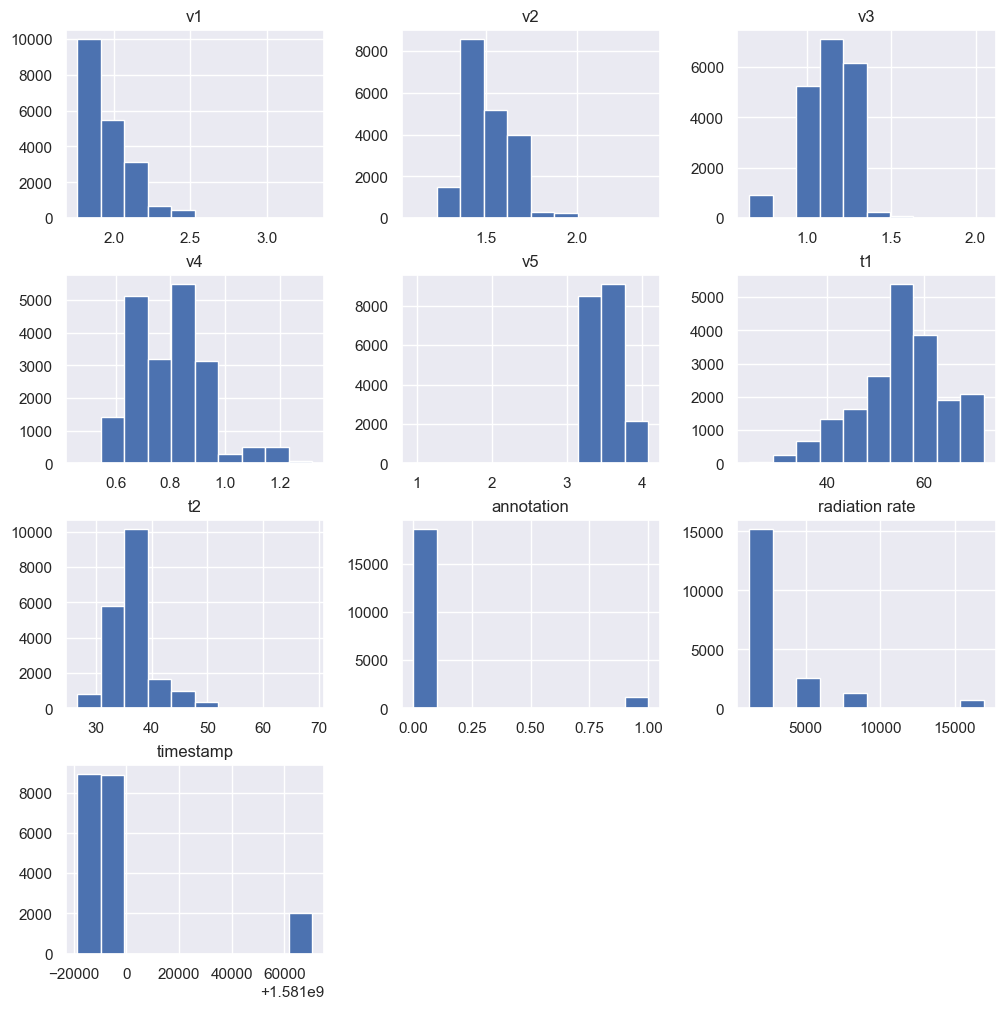

In [779]:
## Histogram view
df.hist(bins=10, figsize=(12,12))

#### Kernel Density Estimation (KDE)

The KDE curve provides a smoothed version of the histogram, showing the underlying distribution of the data. It helps you see if the data has a normal distribution (bell-shaped) or if it’s skewed, multimodal, etc.

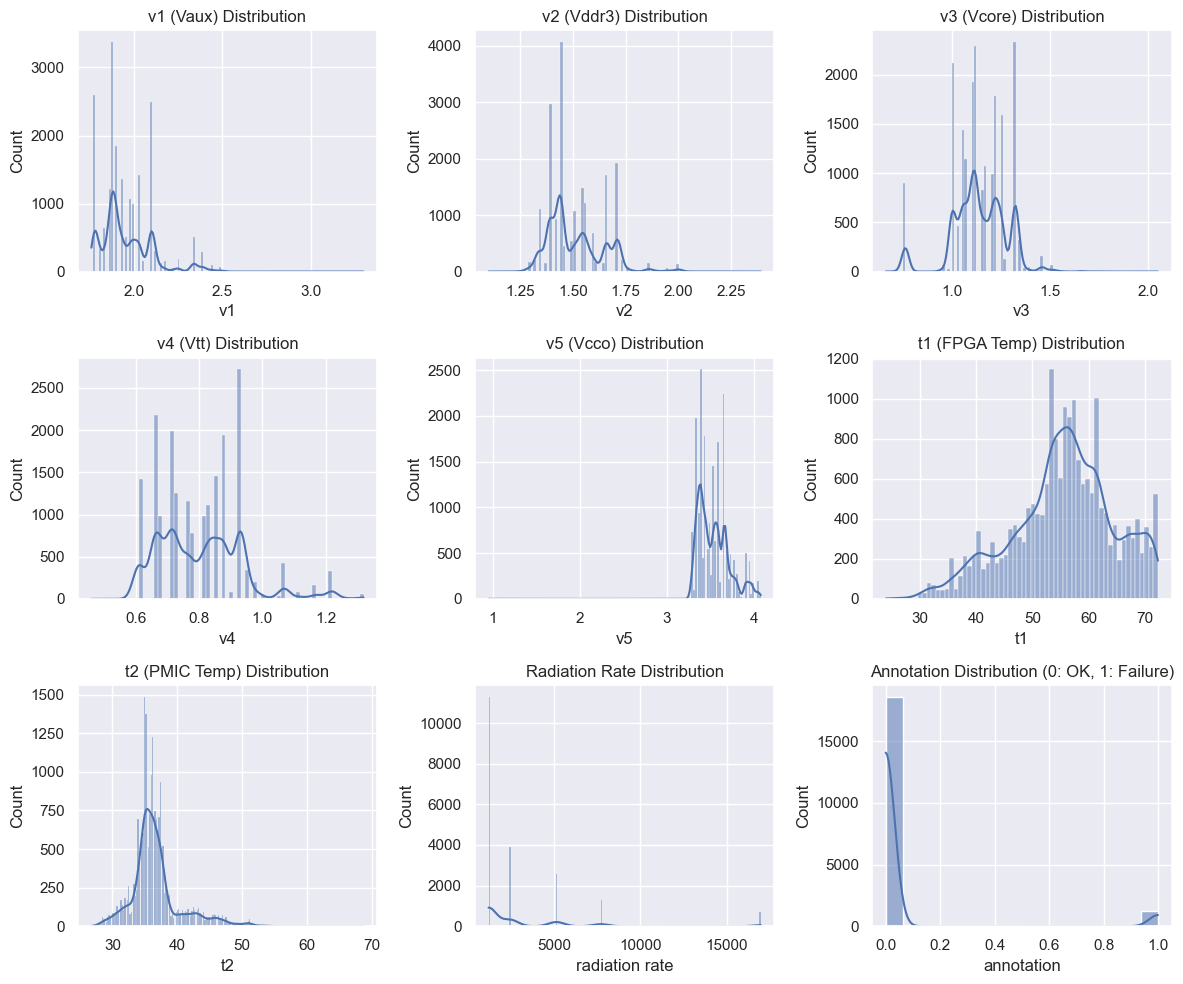

In [780]:
# Plot the distribution of voltage, temperature, and radiation values
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

sns.histplot(df['v1'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('v1 (Vaux) Distribution')

sns.histplot(df['v2'], ax=axes[0, 1], kde=True)
axes[0, 1].set_title('v2 (Vddr3) Distribution')

sns.histplot(df['v3'], ax=axes[0, 2], kde=True)
axes[0, 2].set_title('v3 (Vcore) Distribution')

sns.histplot(df['v4'], ax=axes[1, 0], kde=True)
axes[1, 0].set_title('v4 (Vtt) Distribution')

sns.histplot(df['v5'], ax=axes[1, 1], kde=True)
axes[1, 1].set_title('v5 (Vcco) Distribution')

sns.histplot(df['t1'], ax=axes[1, 2], kde=True)
axes[1, 2].set_title('t1 (FPGA Temp) Distribution')

sns.histplot(df['t2'], ax=axes[2, 0], kde=True)
axes[2, 0].set_title('t2 (PMIC Temp) Distribution')

# Ensure to use the correct column name 'radiation rate'
sns.histplot(df['radiation rate'], ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Radiation Rate Distribution')

sns.histplot(df['annotation'], ax=axes[2, 2], kde=True)
axes[2, 2].set_title('Annotation Distribution (0: OK, 1: Failure)')

plt.tight_layout()
plt.show()


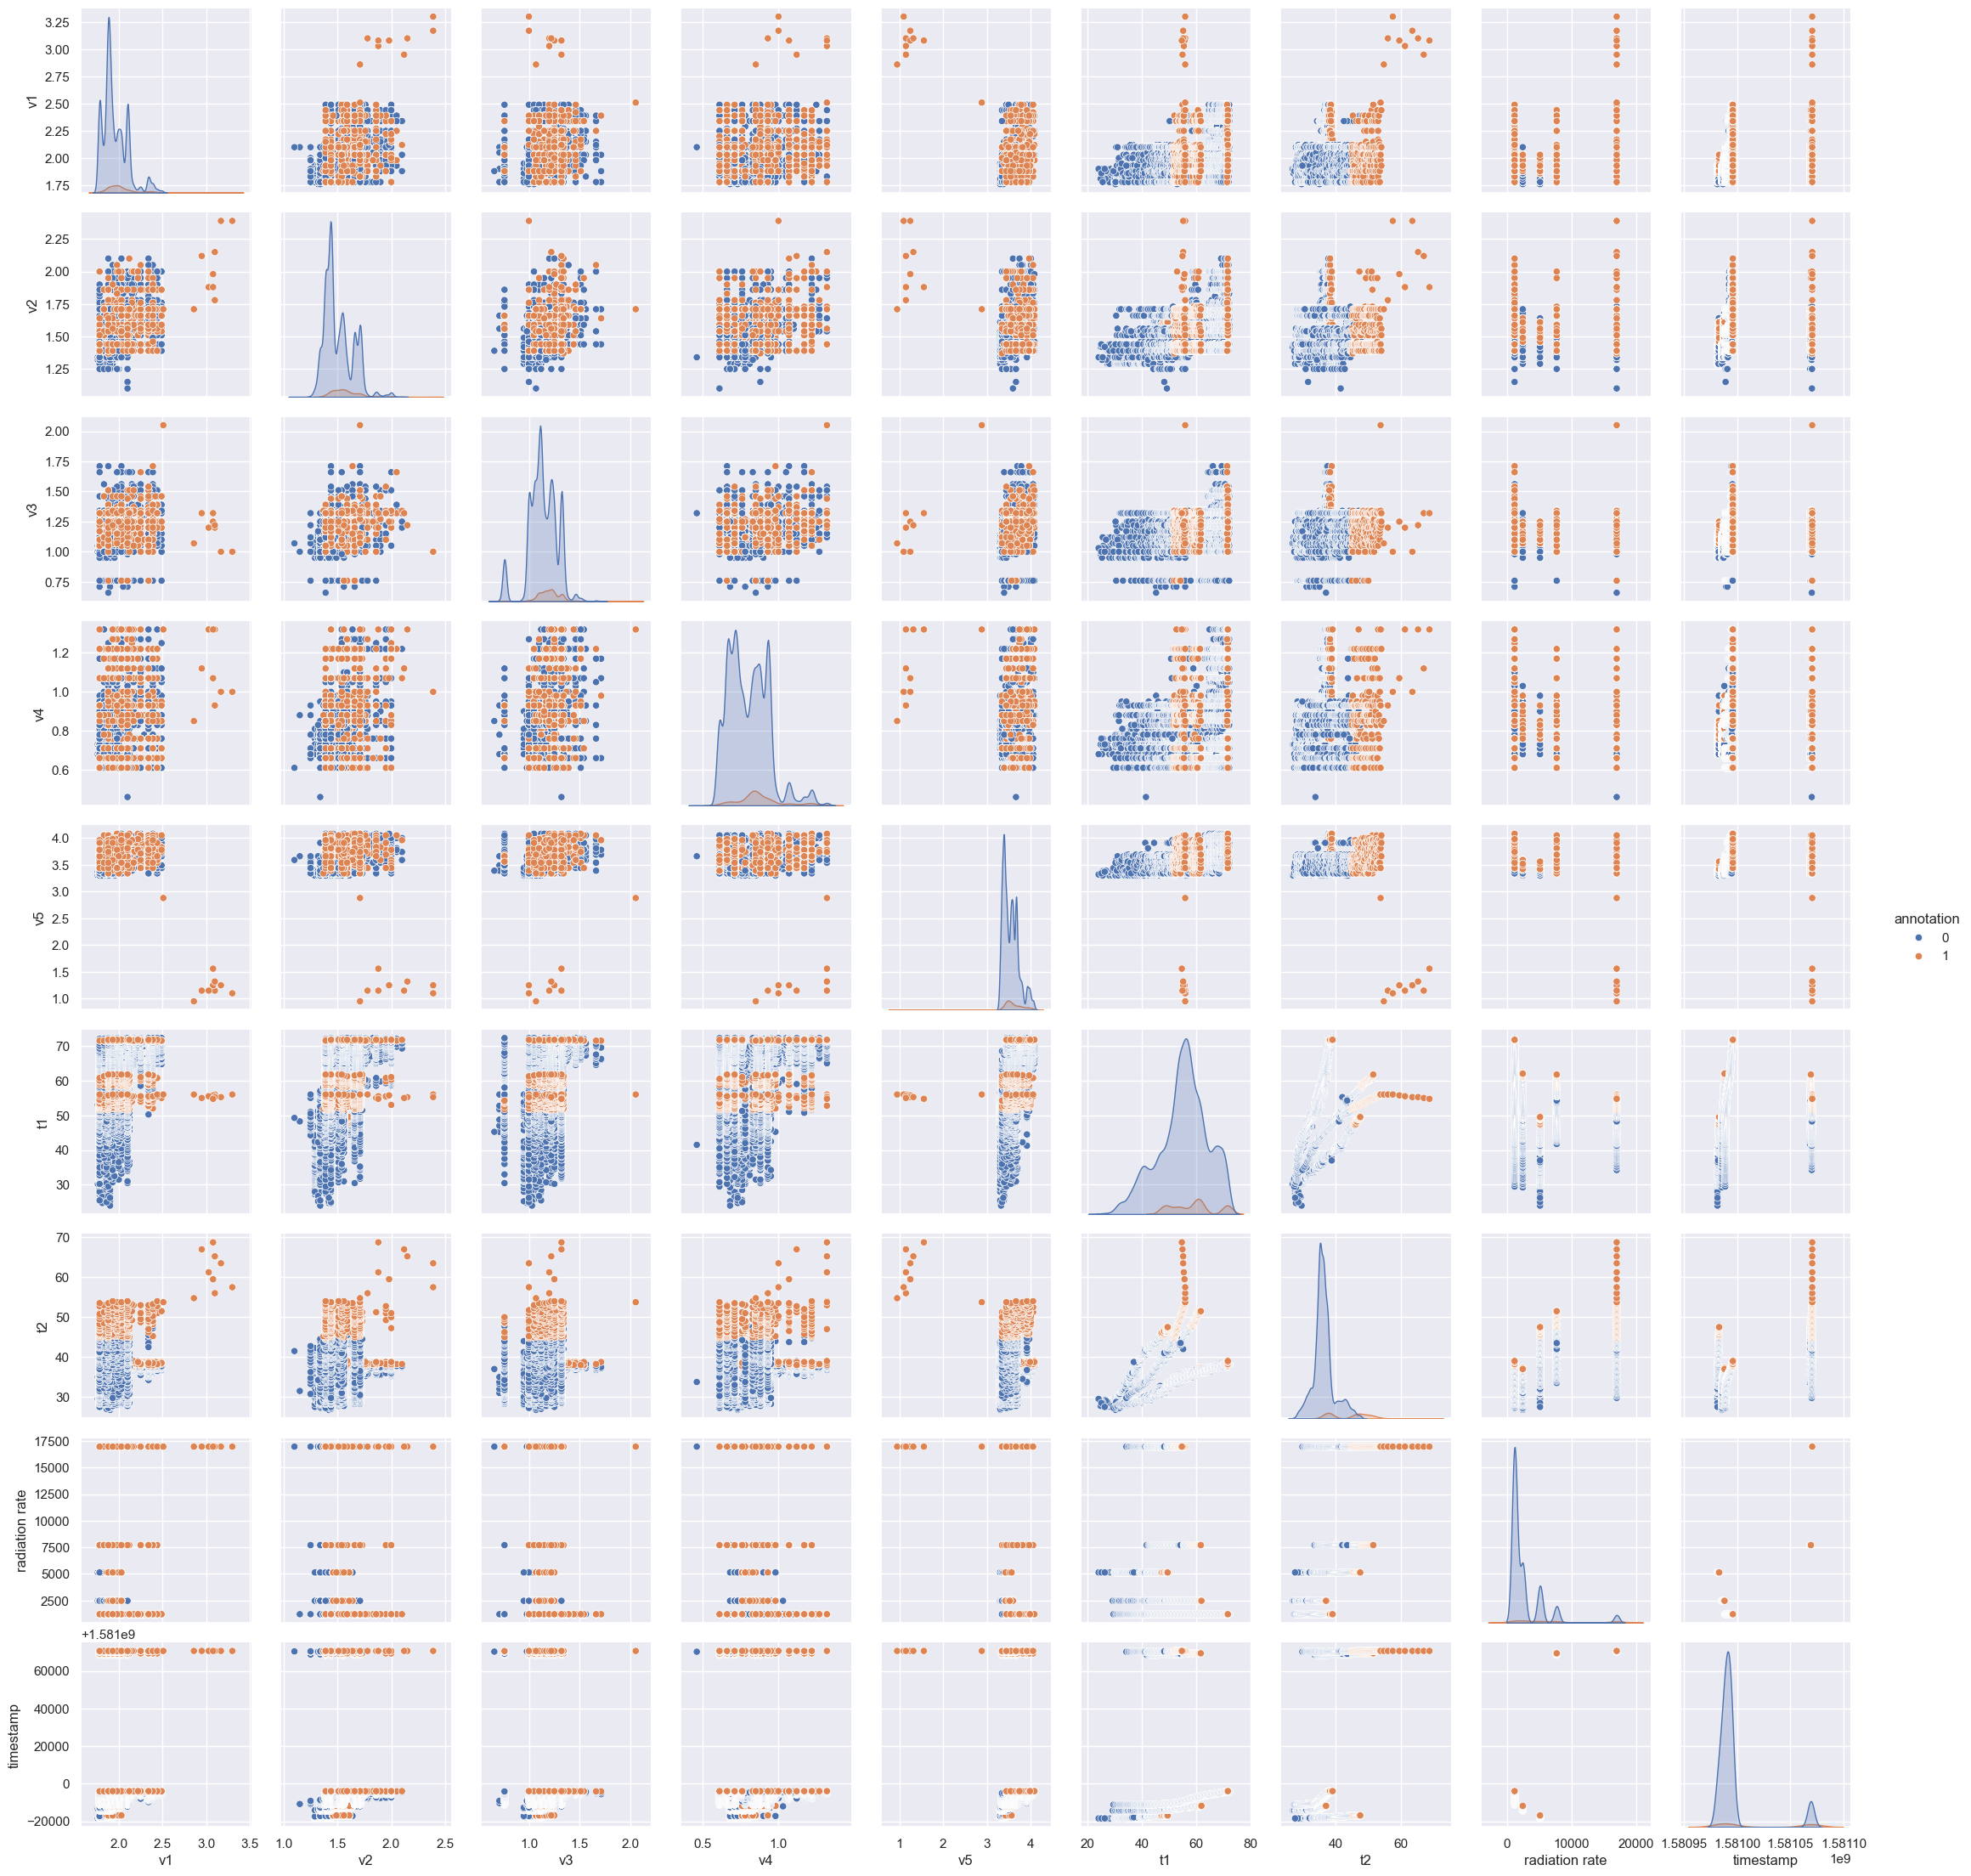

In [781]:
sns.pairplot(df,hue="annotation")

## Correlation Matrix

A correlation matrix is a useful tool for analyzing the relationships between variables in a dataset. Each cell in the matrix represents the correlation between two variables. The value of the correlation coefficient ranges from -1 to +1:\
+1 indicates a perfect positive correlation (as one variable increases, the other increases).\
-1 indicates a perfect negative correlation (as one variable increases, the other decreases).\
0 indicates no correlation between the variables (no relationship).

It helps in feature selection, detecting multicollinearity, feature engineering and understanding the structure of data.

**Feature Selection** is used to reduce the number of features (columns) in your model. If two features are highly correlated, they might carry redundant information, and I could remove one of them. This process helps prevent multicollinearity, which can negatively impact the model’s performance and interpretability.\
**Detecting Multicollinearity** In regression analysis or other machine learning models, multicollinearity occurs when two or more features are highly correlated. This can make it difficult for the model to determine the individual effect of each feature. A correlation matrix helps to detect multicollinearity so can address it (e.g., by removing one of the correlated features).\
**Feature Engineering** When performing feature engineering, a correlation matrix can helps decide whether to combine or transform certain features. If two features are highly correlated, I might decide to combine them into a new feature to simplify the model.\

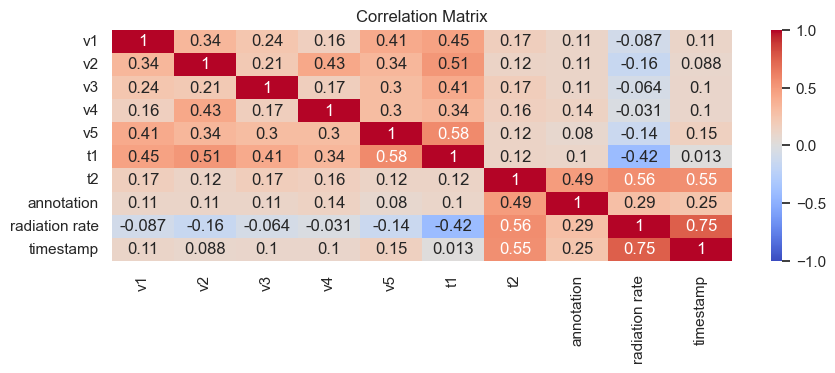

In [782]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


**Above corellation matrix** reveals several important relationships between the variables. A moderate positive correlation of **0.34** exists between `v1` and `v2`, suggesting that as `v1` increases, `v2` also tends to increase, although the relationship is not perfect. Similarly, `v5` and `t1` (FPGA temperature) show a moderate positive correlation of **0.58**, indicating that higher `v5` values are associated with higher `t1` values. Additionally, there is a **0.56** correlation between the `radiation rate` and `t2` (PMIC temperature), which could imply that higher radiation levels may lead to increased PMIC temperatures.

On the negative side, there is a moderate negative correlation of **-0.42** between `t1` (FPGA temperature) and the `radiation rate`, suggesting that as the radiation rate increases, the FPGA temperature tends to decrease, although this relationship is not particularly strong. When looking at the correlations with the `annotation` variable (indicating circuit failure), the strongest relationship is with `t2` (PMIC temperature) at **0.49**, implying that higher PMIC temperatures may be associated with circuit failures. Other variables, like `v1`, `v2`, and `v3`, have much weaker correlations (around **0.11**) with `annotation`, indicating a minimal relationship with the target variable.

Lastly, there is a strong positive correlation of **0.75** between the `timestamp` and the `radiation rate`, indicating that radiation levels tend to increase over time, which may point to time-based variations in the radiation environment. These insights from the correlation matrix are valuable for understanding the data and selecting important features for further analysis.

## Visualizing Relationships with the Target

**Pair plots** help identify relationships and class separations among features.\
**Box plots** highlight differences in distributions and detect outliers across failure and non-failure cases.\
Together, they assist in feature selection, data preprocessing, and gaining a deep understanding of how your features impact the target variable, which is crucial for building a good machine learning model.

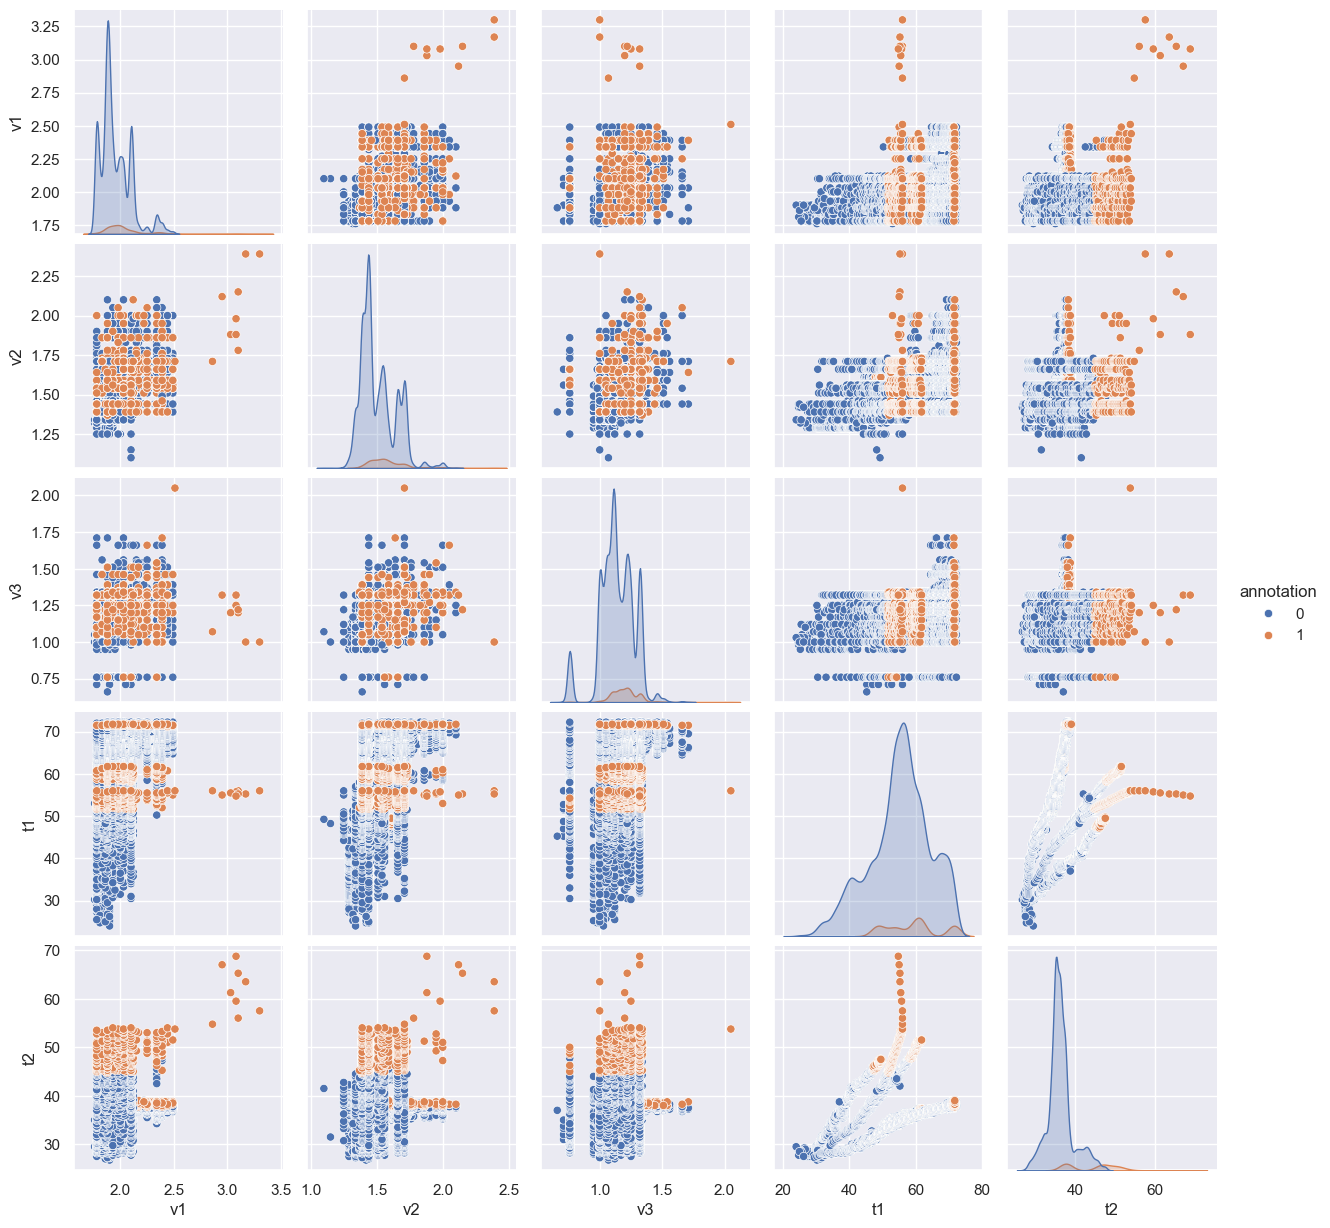

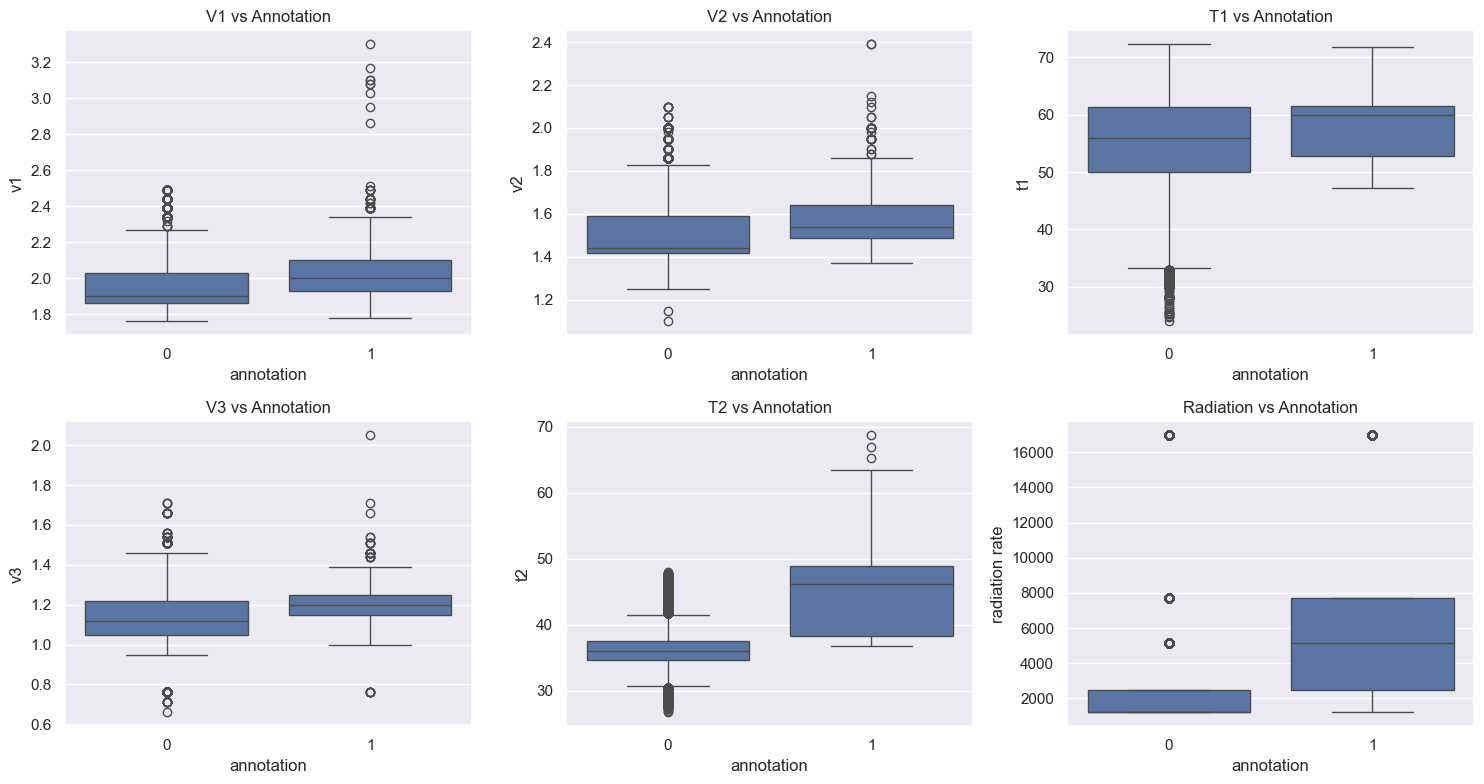

In [783]:
# Optimized pair plot with a subset of variables
selected_columns = ['v1', 'v2', 'v3', 't1', 't2', 'annotation']
sns.pairplot(df[selected_columns], hue="annotation", diag_kind="kde")
plt.show()

# Box plot to compare voltage and temperature distributions by failure status
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.boxplot(x='annotation', y='v1', data=df, ax=axes[0, 0])
axes[0, 0].set_title('V1 vs Annotation')

sns.boxplot(x='annotation', y='v2', data=df, ax=axes[0, 1])
axes[0, 1].set_title('V2 vs Annotation')

sns.boxplot(x='annotation', y='t1', data=df, ax=axes[0, 2])
axes[0, 2].set_title('T1 vs Annotation')

sns.boxplot(x='annotation', y='v3', data=df, ax=axes[1, 0])
axes[1, 0].set_title('V3 vs Annotation')

sns.boxplot(x='annotation', y='t2', data=df, ax=axes[1, 1])
axes[1, 1].set_title('T2 vs Annotation')

sns.boxplot(x='annotation', y='radiation rate', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Radiation vs Annotation')

plt.tight_layout()
plt.show()


# 2. DATA PREPROCESSING

## a) Cleaning The Data

**Cleaning the data** ensures that your machine learning model is learning from *high-quality, reliable, and relevant information*, which leads to *better performance*, *more accurate predictions*, and *trustworthy results*.

#### Remove Duplicates

In [784]:
# Remove duplicates
df = df.drop_duplicates()

# Reset index numbers
df = df.reset_index(drop=True)
# df

In [785]:
# Remove unwanted columns
# df = df.drop(columns = "Not_useful_columns")
# df

#### Remove unwanted symbols Ex: "..white..." or "/who" or "123-123-65-66" and re-format

In [786]:
# 1. Using lstrip or rstrip
# df["column_name"] = df["column_name"].str.lstrip("/")
# df["column_name"] = df["column_name"].str.rstrip("...")
# df

# 2. using only strip
# df["column_name"] = df["column_name"].str.strip("123./")

# 3. Remove symbols which are inbetween, convert to string, then re-format accordingly and remove "NaN"
# df["column_name"].str.replace('[^a-zA-Z0-9']','')
# df["column_name"] = df["column_name"].apply(lambda x: str(x))
# df["column_name"] = df["column_name"].apply(lambda x: x[0:3] + '-' + x[3:6] + '-' + x[6:10])
# df["column_name"] = df["column_name"].str.replace('nan--', '')


**Mean or Median** is used to fill columns which has numerical and continous values.\
**Mode** is used to fill columns which has categorical and discrete values.\
**KNNImputer (K-Nearest Neighbours)** in scikit-learn is a tool used to fill missing values in a dataset by utilizing the *K-nearest neighbors algorithm*. It finds the *k* closest data points (neighbors) that do not have missing values in the same feature and imputes the missing value based on the *average* or another aggregate of those neighbors. The "closeness" of the neighbors is determined by the *Euclidean distance*, which is calculated based on the other available features. The Euclidean distance between two data points is the square root of the sum of squared differences between their feature values. For each missing value, the algorithm calculates the distance to all other points, selects the nearest *k* neighbors, and imputes the missing value using their corresponding feature values. This method provides a more informed imputation compared to simple techniques like mean or median imputation by considering data similarity.

#### Fill missing values

In [787]:
# Numerical and continuous values in that particular column --> MEAN or MODE
# for i in ["column_1", "column_2"]:
#      df[i].fillna(df[i].median(),inplace=True)

# KNNImputer
# impute=KNNImputer
# for i in df.select_dtypes(include="number").columns:
#      df[i]=impute.fit_transform(df[[i]])


#### Convert unwanted column to readable column and make it as index

In [788]:
'''# Convert Unix timestamps to readable format with timezone-aware UTC
df['timestamp_readable'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x, tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S.%f'))

# Set 'timestamp_readable' as the index and drop the original 'timestamp' column
df.set_index('timestamp_readable', inplace=True)
df.drop(columns=['timestamp'], inplace=True)

# Display the DataFrame to check the result
print(df.head())'''

"# Convert Unix timestamps to readable format with timezone-aware UTC\ndf['timestamp_readable'] = df['timestamp'].apply(lambda x: datetime.fromtimestamp(x, tz=timezone.utc).strftime('%Y-%m-%d %H:%M:%S.%f'))\n\n# Set 'timestamp_readable' as the index and drop the original 'timestamp' column\ndf.set_index('timestamp_readable', inplace=True)\ndf.drop(columns=['timestamp'], inplace=True)\n\n# Display the DataFrame to check the result\nprint(df.head())"

#### Find and fix an outliers in dataset

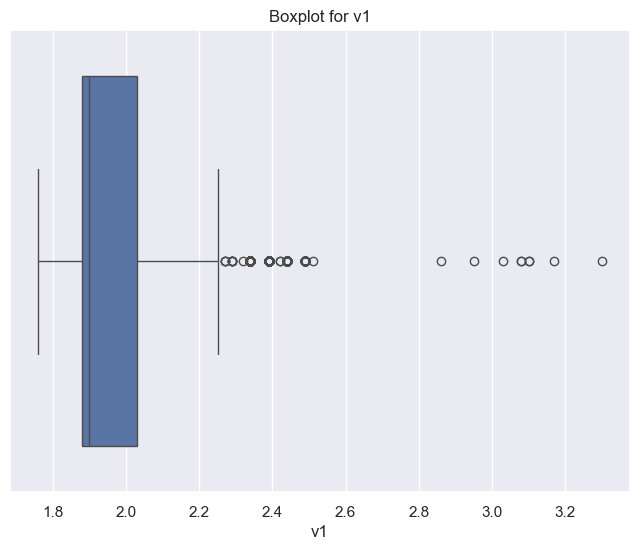

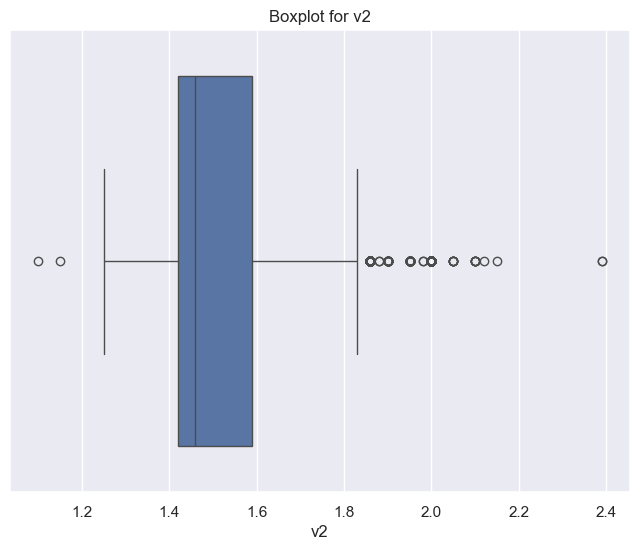

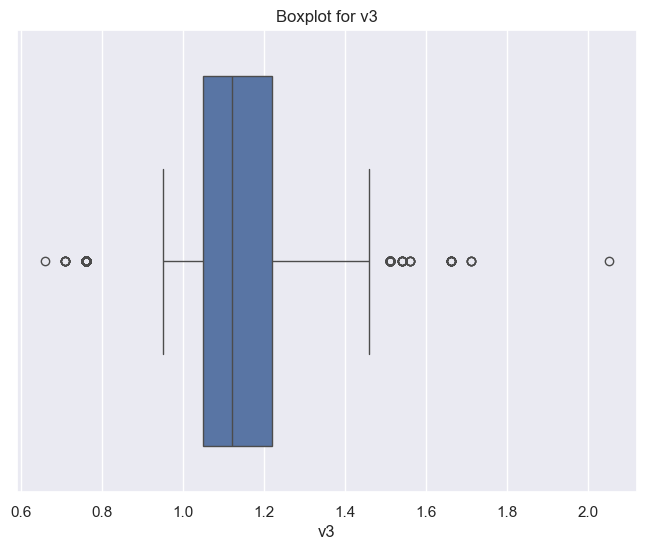

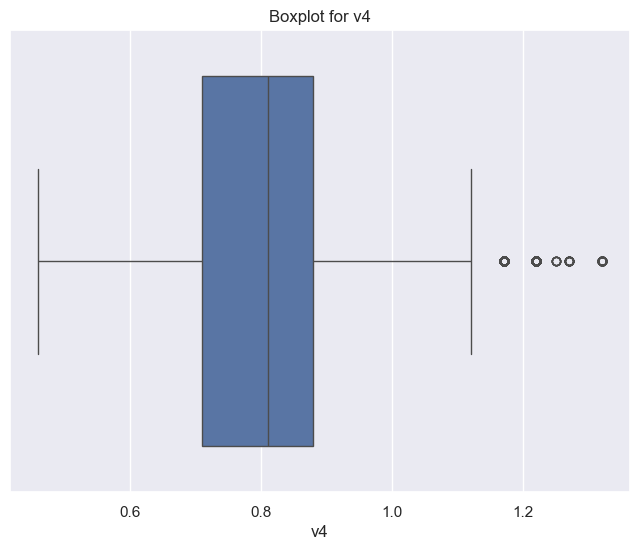

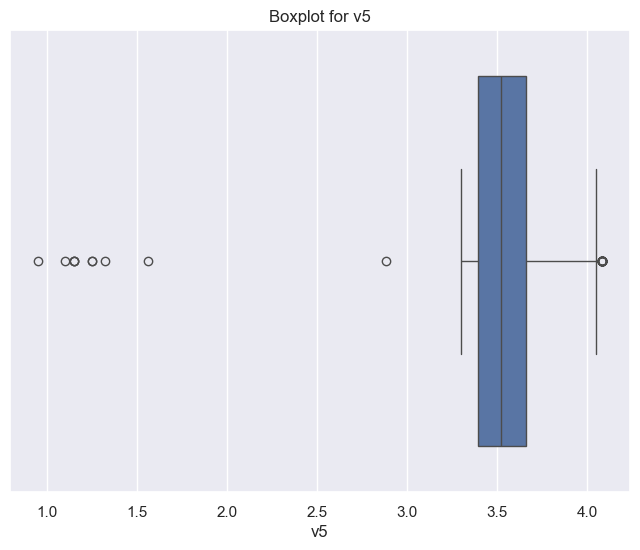

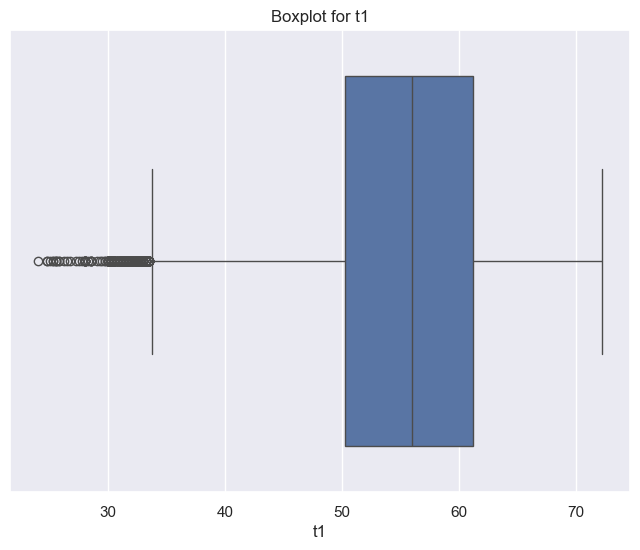

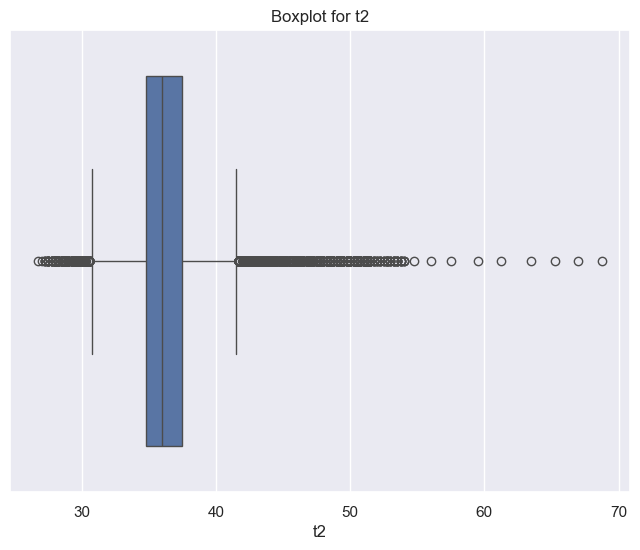

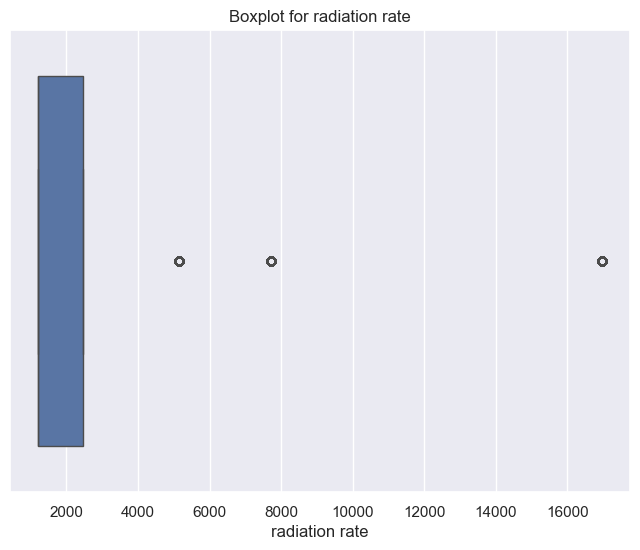

In [789]:
# Plot individual boxplots for each variable (excluding high-range ones like 'annotation')
for column in ['v1','v2','v3','v4','v5','t1','t2','radiation rate']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [790]:
df.head(10)

v1    v2    v3    v4    v5     t1     t2  annotation  radiation rate  \
0  1.90  1.44  1.12  0.68  3.39  28.25  28.00           0            5137   
1  1.78  1.29  1.00  0.71  3.37  27.25  27.50           0            5137   
2  1.90  1.39  1.12  0.73  3.37  27.50  27.50           0            5137   
3  1.78  1.29  1.12  0.68  3.39  27.75  27.75           0            5137   
4  1.88  1.44  1.03  0.68  3.30  28.00  27.50           0            5137   
5  1.78  1.34  1.00  0.71  3.37  28.00  28.25           0            5137   
6  1.78  1.29  1.00  0.73  3.37  28.50  27.50           0            5137   
7  1.83  1.39  1.05  0.71  3.37  28.00  28.00           0            5137   
8  1.83  1.39  1.05  0.71  3.37  28.00  28.00           0            5137   
9  1.83  1.39  1.03  0.73  3.34  28.00  28.00           0            5137   

      timestamp  
0  1.580981e+09  
1  1.580981e+09  
2  1.580981e+09  
3  1.580981e+09  
4  1.580981e+09  
5  1.580981e+09  
6  1.580981e+09  
7  1.580981e+09  
8  1.580981e+09  
9  1.580981e+09

In [791]:
# IQR MEATHOD (Inter Quartile Range)

def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [792]:
# wisker(df['v1'])

In [793]:
# Cap the outliers
for i in ['v1','v2','v3','v4','v5','t1','t2','radiation rate'] :
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])
    
# Save the modified DataFrame to a CSV file (if you want to export it)
df.to_csv('modified_df.csv', index=False)


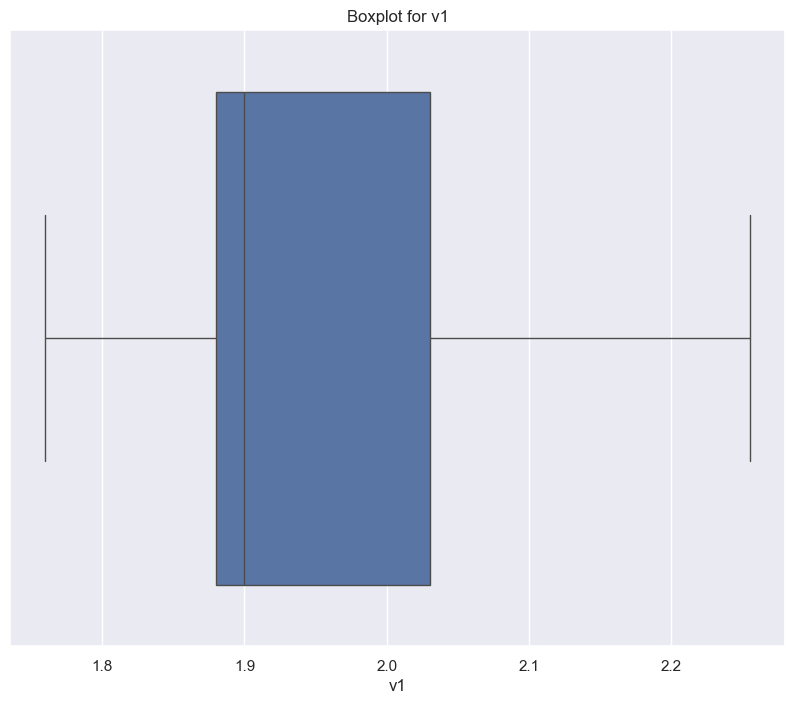

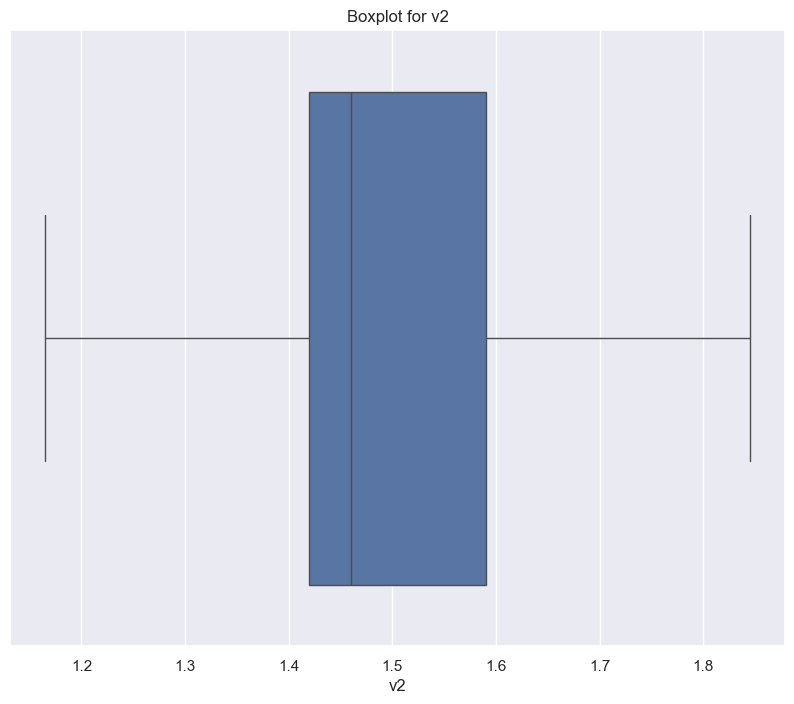

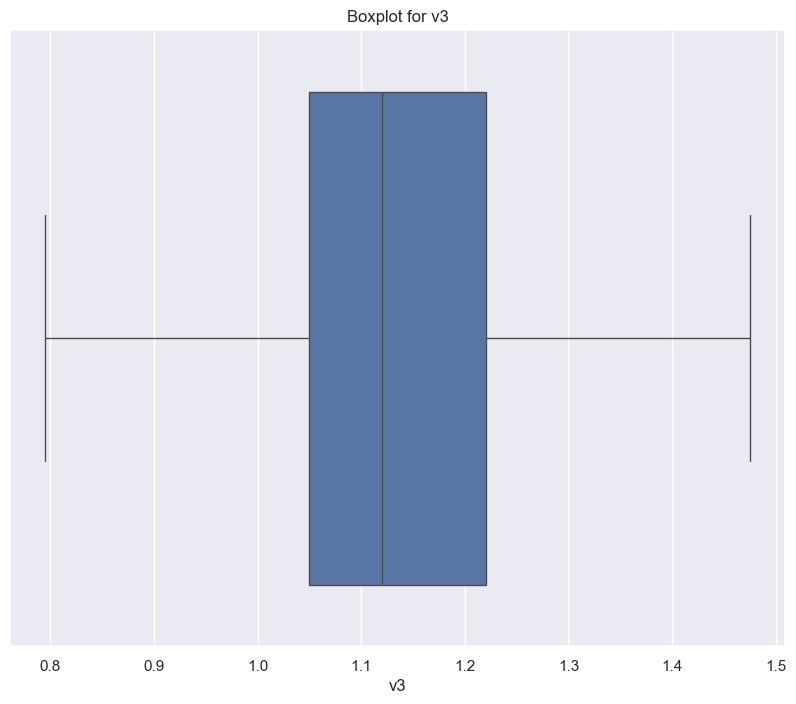

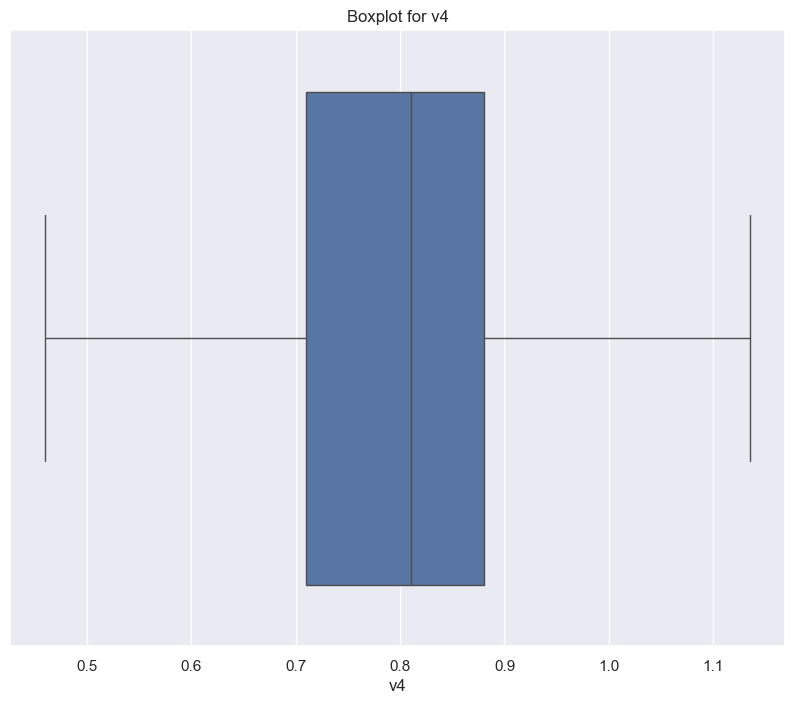

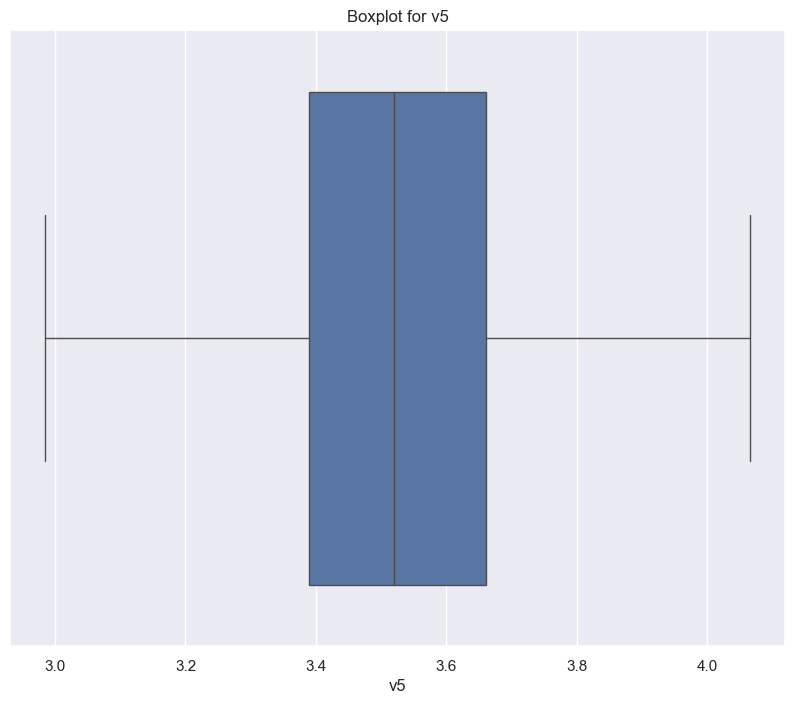

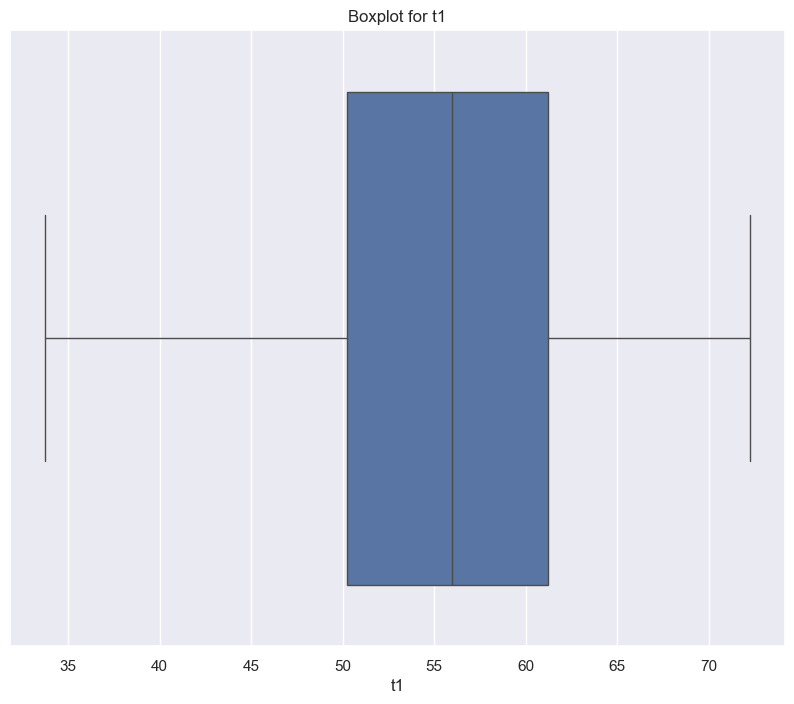

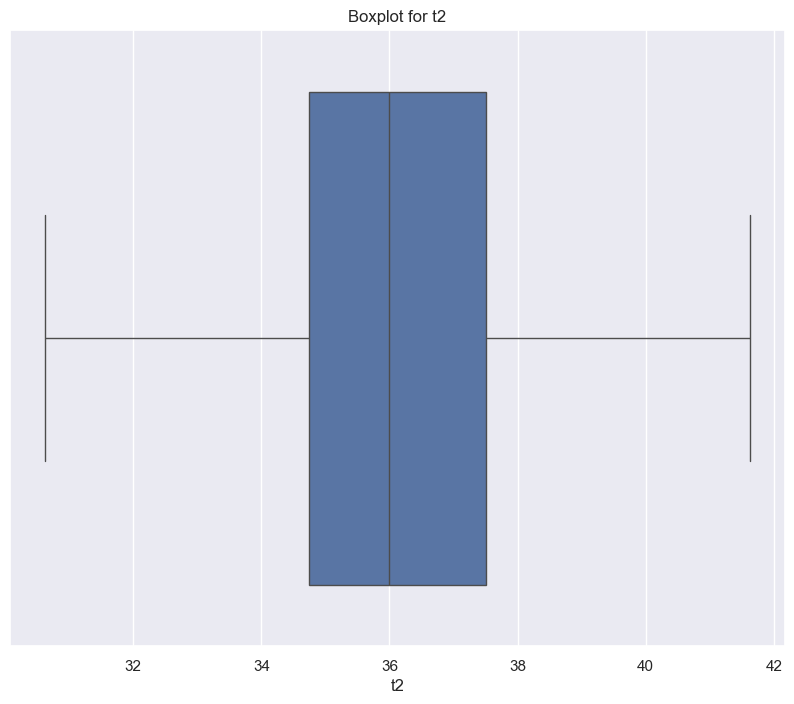

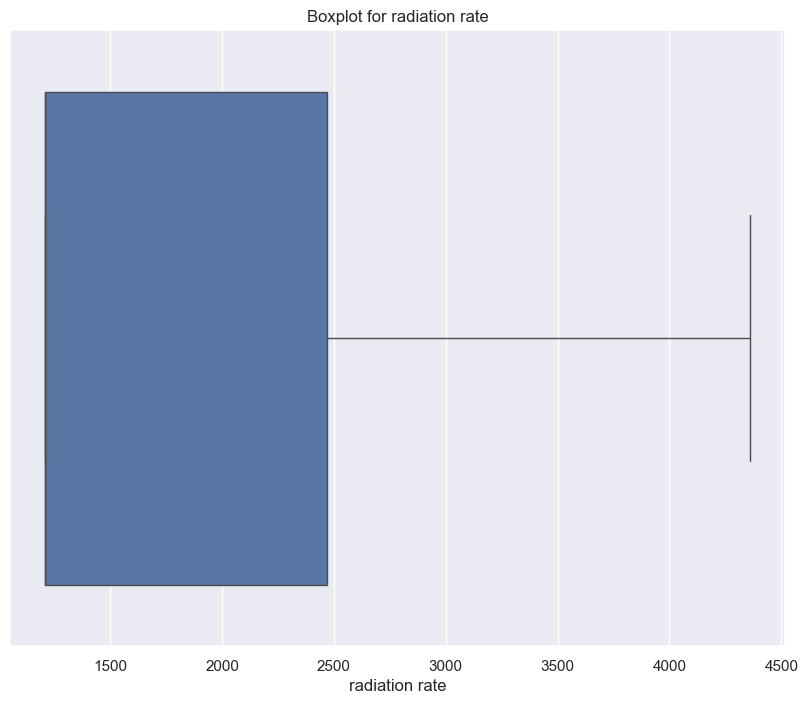

In [794]:
for i in ['v1','v2','v3','v4','v5','t1','t2','radiation rate']:
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [795]:
df.head(10)

v1    v2    v3    v4    v5     t1      t2  annotation  radiation rate  \
0  1.90  1.44  1.12  0.68  3.39  33.75  30.625           0          4359.0   
1  1.78  1.29  1.00  0.71  3.37  33.75  30.625           0          4359.0   
2  1.90  1.39  1.12  0.73  3.37  33.75  30.625           0          4359.0   
3  1.78  1.29  1.12  0.68  3.39  33.75  30.625           0          4359.0   
4  1.88  1.44  1.03  0.68  3.30  33.75  30.625           0          4359.0   
5  1.78  1.34  1.00  0.71  3.37  33.75  30.625           0          4359.0   
6  1.78  1.29  1.00  0.73  3.37  33.75  30.625           0          4359.0   
7  1.83  1.39  1.05  0.71  3.37  33.75  30.625           0          4359.0   
8  1.83  1.39  1.05  0.71  3.37  33.75  30.625           0          4359.0   
9  1.83  1.39  1.03  0.73  3.34  33.75  30.625           0          4359.0   

      timestamp  
0  1.580981e+09  
1  1.580981e+09  
2  1.580981e+09  
3  1.580981e+09  
4  1.580981e+09  
5  1.580981e+09  
6  1.580981e+09  
7  1.580981e+09  
8  1.580981e+09  
9  1.580981e+09

In [796]:
# List to store outliers
'''outliers = []

# Function to detect outliers using the Z-score method
def detect_outliers(data):
    threshold = 3  # Z-score threshold for defining an outlier
    mean = np.mean(data)
    std = np.std(data)
    
    outliers = []
    
    # Calculate Z-scores for each point in the data
    for value in data:
        z_score = (value - mean) / std
        if np.abs(z_score) > threshold:  # If the Z-score is greater than the threshold
            outliers.append(value)
    
    return outliers

# Example usage: Check for outliers in columns 'v1' and 'v2'
for col in ['v1']:
    outlier_points = detect_outliers(df[col])
    print(f"Outliers in {col}: {outlier_points}")'''
    

'outliers = []\n\n# Function to detect outliers using the Z-score method\ndef detect_outliers(data):\n    threshold = 3  # Z-score threshold for defining an outlier\n    mean = np.mean(data)\n    std = np.std(data)\n    \n    outliers = []\n    \n    # Calculate Z-scores for each point in the data\n    for value in data:\n        z_score = (value - mean) / std\n        if np.abs(z_score) > threshold:  # If the Z-score is greater than the threshold\n            outliers.append(value)\n    \n    return outliers\n\n# Example usage: Check for outliers in columns \'v1\' and \'v2\'\nfor col in [\'v1\']:\n    outlier_points = detect_outliers(df[col])\n    print(f"Outliers in {col}: {outlier_points}")'

In [797]:
# Function to cap outliers based on Z-score
'''def cap_outliers_zscore(df, column, threshold=3):
    mean = np.mean(df[column])
    std = np.std(df[column])
    
    # Calculate the upper and lower bounds (3 standard deviations away from the mean)
    upper_bound = mean + threshold * std
    lower_bound = mean - threshold * std
    
    # Cap the values at the upper and lower bounds
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    
    return df

# Cap outliers in 'v1' and 'v2'
df_capped_v1 = cap_outliers_zscore(df, 'v1')
df_capped_v2 = cap_outliers_zscore(df, 'v2')

print("Data after capping outliers in v1 and v2:")
print(df_capped_v1)'''


'def cap_outliers_zscore(df, column, threshold=3):\n    mean = np.mean(df[column])\n    std = np.std(df[column])\n    \n    # Calculate the upper and lower bounds (3 standard deviations away from the mean)\n    upper_bound = mean + threshold * std\n    lower_bound = mean - threshold * std\n    \n    # Cap the values at the upper and lower bounds\n    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])\n    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])\n    \n    return df\n\n# Cap outliers in \'v1\' and \'v2\'\ndf_capped_v1 = cap_outliers_zscore(df, \'v1\')\ndf_capped_v2 = cap_outliers_zscore(df, \'v2\')\n\nprint("Data after capping outliers in v1 and v2:")\nprint(df_capped_v1)'

In [798]:
'''for i in ['v1','v2','v3','v4','v5','t1','t2','radiation rate','timestamp']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.show()'''

"for i in ['v1','v2','v3','v4','v5','t1','t2','radiation rate','timestamp']:\n    plt.figure(figsize=(8, 4))\n    sns.boxplot(x=df[column])\n    plt.title(f'Boxplot for {column}')\n    plt.show()"

# 3. FEATURE SELECTION

#### ANOVA F-test (for classification related tasks)

In [799]:
from sklearn.feature_selection import SelectKBest, f_classif

# Features (X) and target (y)
X = df[['v1', 'v2', 'v3', 'v4', 'v5', 't1', 't2', 'radiation rate', 'timestamp']]
y = df['annotation']

# Apply ANOVA F-Test
select_k_best = SelectKBest(score_func=f_classif, k='all')
fit = select_k_best.fit(X, y)

# Create a DataFrame to display the F-scores for each feature
feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': fit.scores_})
feature_scores = feature_scores.sort_values(by='F-Score', ascending=False)

print("ANOVA F-Test Scores for Features:\n", feature_scores)


ANOVA F-Test Scores for Features:
           Feature      F-Score
6              t2  2569.491631
8       timestamp  1268.371020
7  radiation rate  1103.495857
3              v4   364.434400
2              v3   265.180192
1              v2   245.424215
0              v1   236.072345
5              t1   212.364836
4              v5   201.852317


## Correlation Matrix (for linear relationships)

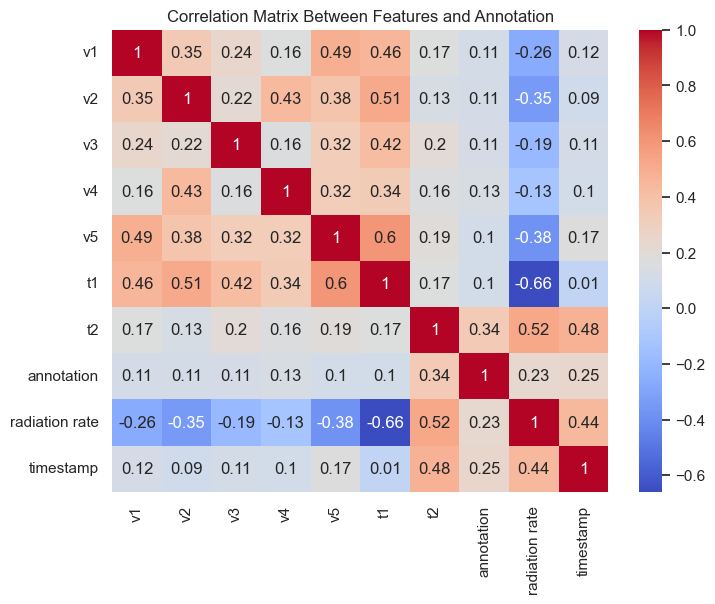

Correlation with annotation:
 annotation        1.000000
t2                0.338934
timestamp         0.245378
radiation rate    0.229772
v4                0.134443
v3                0.114966
v2                0.110655
v1                0.108552
t1                0.103018
v5                0.100462
Name: annotation, dtype: float64


In [800]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Between Features and Annotation")
plt.show()

# Extract correlations with the target 'annotation'
correlation_with_target = correlation_matrix["annotation"].abs().sort_values(ascending=False)
print("Correlation with annotation:\n", correlation_with_target)


## Mutual Information (for non-linear relationships)

In [801]:
from sklearn.feature_selection import mutual_info_classif

# Apply Mutual Information
mutual_info = mutual_info_classif(X, y)

# Create a DataFrame to display the mutual information score for each feature
mi_scores = pd.DataFrame({'Feature': X.columns, 'MI-Score': mutual_info})
mi_scores = mi_scores.sort_values(by='MI-Score', ascending=False)

print("Mutual Information Scores for Features:\n", mi_scores)


Mutual Information Scores for Features:
           Feature  MI-Score
8       timestamp  0.228224
6              t2  0.096886
5              t1  0.079391
4              v5  0.029872
1              v2  0.028792
7  radiation rate  0.023959
3              v4  0.022242
0              v1  0.019686
2              v3  0.019089


I need all features

# 4. PREPARING THE DATA

In [802]:
# Convert the 'timestamp' column from Unix time to a human-readable format
df['timestamp_readable'] = pd.to_datetime(df['timestamp'], unit='s')

# Set 'timestamp_readable' as the index
df.set_index('timestamp_readable', inplace=True)

# Drop the original 'timestamp' column if no longer needed
df.drop(columns=['timestamp'], inplace=True)

# Display the updated DataFrame
print(df.head())


                                 v1    v2    v3    v4    v5     t1      t2  \
timestamp_readable                                                           
2020-02-06 09:31:10.970360041  1.90  1.44  1.12  0.68  3.39  33.75  30.625   
2020-02-06 09:31:13.216010094  1.78  1.29  1.00  0.71  3.37  33.75  30.625   
2020-02-06 09:31:13.854899883  1.90  1.39  1.12  0.73  3.37  33.75  30.625   
2020-02-06 09:31:14.493870020  1.78  1.29  1.12  0.68  3.39  33.75  30.625   
2020-02-06 09:31:15.128740072  1.88  1.44  1.03  0.68  3.30  33.75  30.625   

                               annotation  radiation rate  
timestamp_readable                                         
2020-02-06 09:31:10.970360041           0          4359.0  
2020-02-06 09:31:13.216010094           0          4359.0  
2020-02-06 09:31:13.854899883           0          4359.0  
2020-02-06 09:31:14.493870020           0          4359.0  
2020-02-06 09:31:15.128740072           0          4359.0  


In [803]:
df.head(10)


v1    v2    v3    v4    v5     t1      t2  \
timestamp_readable                                                           
2020-02-06 09:31:10.970360041  1.90  1.44  1.12  0.68  3.39  33.75  30.625   
2020-02-06 09:31:13.216010094  1.78  1.29  1.00  0.71  3.37  33.75  30.625   
2020-02-06 09:31:13.854899883  1.90  1.39  1.12  0.73  3.37  33.75  30.625   
2020-02-06 09:31:14.493870020  1.78  1.29  1.12  0.68  3.39  33.75  30.625   
2020-02-06 09:31:15.128740072  1.88  1.44  1.03  0.68  3.30  33.75  30.625   
2020-02-06 09:31:15.767689943  1.78  1.34  1.00  0.71  3.37  33.75  30.625   
2020-02-06 09:31:16.406589985  1.78  1.29  1.00  0.73  3.37  33.75  30.625   
2020-02-06 09:31:17.041480064  1.83  1.39  1.05  0.71  3.37  33.75  30.625   
2020-02-06 09:31:17.680389881  1.83  1.39  1.05  0.71  3.37  33.75  30.625   
2020-02-06 09:31:18.319370031  1.83  1.39  1.03  0.73  3.34  33.75  30.625   

                               annotation  radiation rate  
timestamp_readable                                         
2020-02-06 09:31:10.970360041           0          4359.0  
2020-02-06 09:31:13.216010094           0          4359.0  
2020-02-06 09:31:13.854899883           0          4359.0  
2020-02-06 09:31:14.493870020           0          4359.0  
2020-02-06 09:31:15.128740072           0          4359.0  
2020-02-06 09:31:15.767689943           0          4359.0  
2020-02-06 09:31:16.406589985           0          4359.0  
2020-02-06 09:31:17.041480064           0          4359.0  
2020-02-06 09:31:17.680389881           0          4359.0  
2020-02-06 09:31:18.319370031           0          4359.0

#### Min-max Normalization

**FEATURE SCALING** is important inorder to make data fit into a particular range so that it is easy for modelling. This is very very important becasue it is *faster convergence* and *computing distance appropriately.*\ 
There are 2 types of feature scaling\
1. min-max normalization \
2. standardization\

**1. Normalizing data** Scales the data to a range, typically between 0 and 1. This is useful when you do not assume a normal distribution or if your features have different units.
$$
X_{\text{norm}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
$$
Where: Xmin and Xmax are the minimum and maximum values of the feature.

**2. Standardization** involves the Z-score and transforms data to a standard scale (mean = 0, std = 1).
$$
X_{\text{std}} = \frac{X - mean}{std}
$$


  

In [804]:
# Normalization 

numerical_columns = ['v1', 'v2', 'v3', 'v4', 'v5', 't1', 't2', 'radiation rate']

# Initialize MinMaxScaler for normalization (scales data to range [0, 1])
normalizer = MinMaxScaler()

# Fit the scaler and transform the data for only the numerical columns
df[numerical_columns] = normalizer.fit_transform(df[numerical_columns])

# Display the updated DataFrame to verify changes
print(df.head(10))


                                     v1        v2        v3        v4  \
timestamp_readable                                                      
2020-02-06 09:31:10.970360041  0.282828  0.404412  0.477941  0.325926   
2020-02-06 09:31:13.216010094  0.040404  0.183824  0.301471  0.370370   
2020-02-06 09:31:13.854899883  0.282828  0.330882  0.477941  0.400000   
2020-02-06 09:31:14.493870020  0.040404  0.183824  0.477941  0.325926   
2020-02-06 09:31:15.128740072  0.242424  0.404412  0.345588  0.325926   
2020-02-06 09:31:15.767689943  0.040404  0.257353  0.301471  0.370370   
2020-02-06 09:31:16.406589985  0.040404  0.183824  0.301471  0.400000   
2020-02-06 09:31:17.041480064  0.141414  0.330882  0.375000  0.370370   
2020-02-06 09:31:17.680389881  0.141414  0.330882  0.375000  0.370370   
2020-02-06 09:31:18.319370031  0.141414  0.330882  0.345588  0.400000   

                                     v5   t1   t2  annotation  radiation rate  
timestamp_readable                         

In [805]:
df.tail(10)

v1        v2        v3        v4   v5  \
timestamp_readable                                                      
2020-02-07 10:16:42.161700010  1.0  0.801471  1.000000  1.000000  0.0   
2020-02-07 10:16:42.796489954  1.0  0.801471  0.404412  0.577778  0.0   
2020-02-07 10:16:43.435420036  1.0  0.904412  0.595588  0.696296  0.0   
2020-02-07 10:16:44.074840069  1.0  1.000000  0.301471  0.800000  0.0   
2020-02-07 10:16:44.713320017  1.0  1.000000  0.669118  0.903704  0.0   
2020-02-07 10:16:45.348320007  1.0  1.000000  0.595588  1.000000  0.0   
2020-02-07 10:16:45.987480164  1.0  1.000000  0.301471  0.800000  0.0   
2020-02-07 10:16:46.626130104  1.0  1.000000  0.625000  1.000000  0.0   
2020-02-07 10:16:47.261039972  1.0  1.000000  0.772059  0.977778  0.0   
2020-02-07 10:16:47.900389910  1.0  1.000000  0.772059  1.000000  0.0   

                                     t1   t2  annotation  radiation rate  
timestamp_readable                                                        
2020-02-07 10:16:42.161700010  0.577922  1.0           1             1.0  
2020-02-07 10:16:42.796489954  0.577922  1.0           1             1.0  
2020-02-07 10:16:43.435420036  0.577922  1.0           1             1.0  
2020-02-07 10:16:44.074840069  0.577922  1.0           1             1.0  
2020-02-07 10:16:44.713320017  0.571429  1.0           1             1.0  
2020-02-07 10:16:45.348320007  0.564935  1.0           1             1.0  
2020-02-07 10:16:45.987480164  0.558442  1.0           1             1.0  
2020-02-07 10:16:46.626130104  0.558442  1.0           1             1.0  
2020-02-07 10:16:47.261039972  0.551948  1.0           1             1.0  
2020-02-07 10:16:47.900389910  0.545455  1.0           1             1.0

#### Encoding categorical variables 

Since my dataset only contains numerical values except for the column names, categorical encoding isn't required for my data preprocessing. This is because encoding is only necessary when I have categorical (non-numeric) features that need to be converted to a numeric format for machine learning algorithms. There are different types of categorical data: nominal data, which lacks any **inherent order** (e.g., colors like red, blue, and green), and **ordinal data**, where the categories have a meaningful order (e.g., sizes like small, medium, and large).\
\
Various methods exist to encode categorical variables.
1. **Label encoding**, where each unique category is assigned a specific integer value. This method works well when dealing with ordinal data but can sometimes be misleading for nominal data, as machine learning models might interpret higher numerical values as more important.
2. **One-hot encoding**, which creates a binary column for each unique category, where the presence or absence of that category is represented by 1 or 0, respectively. This method is highly effective for nominal data, as it prevents the model from assuming any ordinal relationship between categories. However, one-hot encoding can result in many new columns if the categorical variable has numerous unique values (high cardinality).\
\
Other encoding methods include **binary encoding**, where categories are first converted into integers and then into binary codes, reducing the dimensionality caused by one-hot encoding in high-cardinality scenarios. **Target or mean encoding** is another approach, where categories are replaced by the mean of the target variable for each category, often used in regression or classification problems, though care must be taken to avoid data leakage.


# 5. MODEL BUILDING

## a) Selection of Algorithm

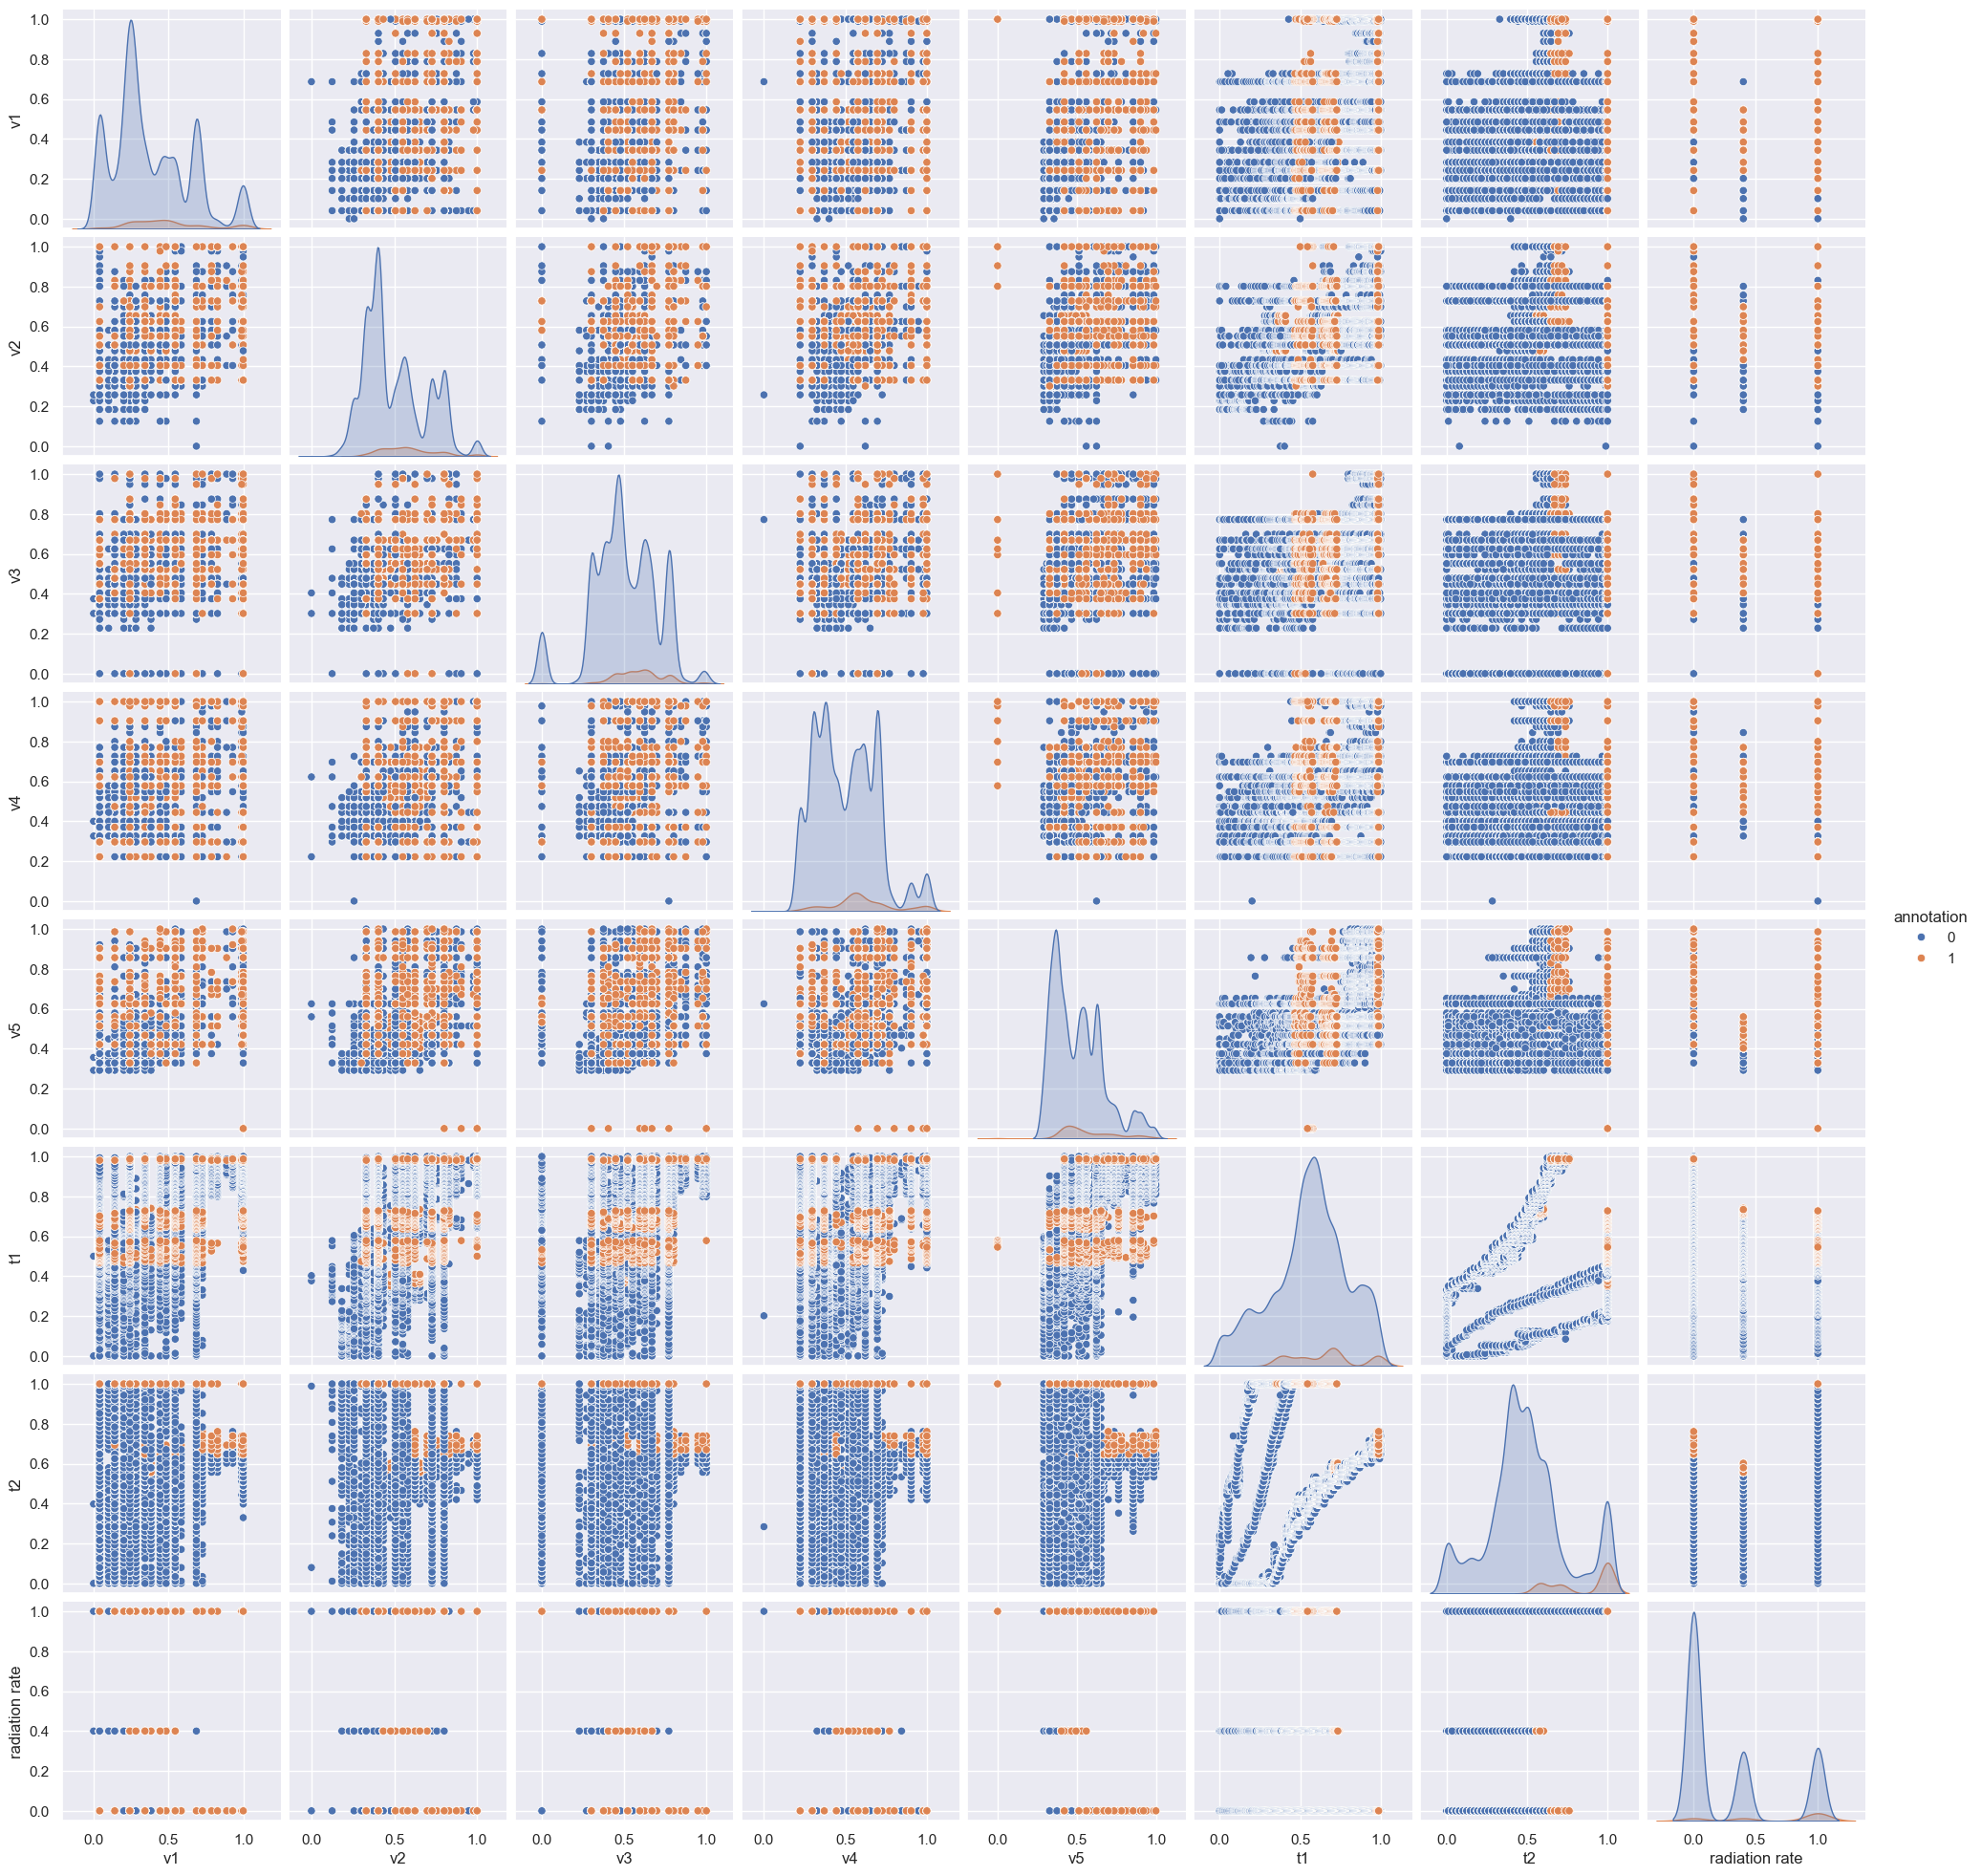

In [806]:
sns.pairplot(df,hue="annotation")

In [807]:
X = df.drop(columns=['annotation'])  # Drop the target column to get the features
y = df['annotation']  # Target column (annotation, 0 or 1)

# Step 3: Check the shape of the data to ensure it's properly separated
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

# Optional: Display the first few rows to confirm everything is as expected
#print(X.head())  # Displays the features
print(y.tail(10))  # Displays the target column

Features (X) shape: (19800, 8)
Target (y) shape: (19800,)
timestamp_readable
2020-02-07 10:16:42.161700010    1
2020-02-07 10:16:42.796489954    1
2020-02-07 10:16:43.435420036    1
2020-02-07 10:16:44.074840069    1
2020-02-07 10:16:44.713320017    1
2020-02-07 10:16:45.348320007    1
2020-02-07 10:16:45.987480164    1
2020-02-07 10:16:46.626130104    1
2020-02-07 10:16:47.261039972    1
2020-02-07 10:16:47.900389910    1
Name: annotation, dtype: int64


## b) Split and balance data into train_test using sklearn train_test_split

In [808]:
# Make sure that X (input) and y (target) are defined
X = df[['v1', 'v2', 'v3', 'v4', 'v5', 't1', 't2', 'radiation rate']]
y = df['annotation']

In [809]:
y.head(10)

timestamp_readable
2020-02-06 09:31:10.970360041    0
2020-02-06 09:31:13.216010094    0
2020-02-06 09:31:13.854899883    0
2020-02-06 09:31:14.493870020    0
2020-02-06 09:31:15.128740072    0
2020-02-06 09:31:15.767689943    0
2020-02-06 09:31:16.406589985    0
2020-02-06 09:31:17.041480064    0
2020-02-06 09:31:17.680389881    0
2020-02-06 09:31:18.319370031    0
Name: annotation, dtype: int64

In [810]:
# Training = 80% 
# Testing = 20%

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)
# X_train

# Step 1: Split the dataset into training and testing sets (before applying SMOTE)
X_train_before_balance, X_test_before_balance, y_train_before_balance, y_test_before_balance = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Initialize SMOTE for balancing the training set
smote = SMOTE(random_state=42)

# Apply SMOTE only on the training data
X_train, y_train = smote.fit_resample(X_train_before_balance, y_train_before_balance)

# Display the class distribution after balancing
print("Class distribution before balancing:", pd.Series(y_train_before_balance).value_counts())
print("Class distribution after balancing:", pd.Series(y_train_before_balance).value_counts())

# Now 'X_train' and 'y_train' are the balanced versions of the training data


Class distribution before balancing: annotation
0    14880
1      960
Name: count, dtype: int64
Class distribution after balancing: annotation
0    14880
1      960
Name: count, dtype: int64


## c) Random forest using Stratified K-fold

In [817]:
# Define the number of splits for Stratified K-Fold
n_splits = 5  # 5-fold cross-validation

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Lists to store evaluation metrics across each fold
rf_accuracy_scores = []
rf_precision_scores = []
rf_recall_scores = []
rf_f1_scores = []

# Perform Stratified K-Fold Cross-Validation on the training data
for train_index, val_index in skf.split(X_train, y_train):
    # Split the training data into current fold's training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the Random Forest model on the training fold
    rf_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = rf_model.predict(X_val_fold)

    # Calculate evaluation metrics
    rf_accuracy = accuracy_score(y_val_fold, y_val_pred)
    rf_precision = precision_score(y_val_fold, y_val_pred)
    rf_recall = recall_score(y_val_fold, y_val_pred)
    rf_f1 = f1_score(y_val_fold, y_val_pred)

    # Append metrics to respective lists
    rf_accuracy_scores.append(rf_accuracy)
    rf_precision_scores.append(rf_precision)
    rf_recall_scores.append(rf_recall)
    rf_f1_scores.append(rf_f1)

# Calculate the average performance metrics across all folds for Random Forest
rf_average_metrics = {
    'RF_Metric': ['RF_Accuracy', 'RF_Precision', 'RF_Recall', 'RF_F1-Score'],
    'RF_Average': [
        sum(rf_accuracy_scores) / n_splits,
        sum(rf_precision_scores) / n_splits,
        sum(rf_recall_scores) / n_splits,
        sum(rf_f1_scores) / n_splits
    ]
}

# Create a pandas DataFrame for Random Forest results
df_rf_metrics = pd.DataFrame(rf_average_metrics)

# Display the DataFrame
print("Random Forest Performance Metrics")
df_rf_metrics


Random Forest Performance Metrics


RF_Metric  RF_Average
0   RF_Accuracy    0.992473
1  RF_Precision    0.988732
2     RF_Recall    0.996304
3   RF_F1-Score    0.992502

## d) Linear regression using Stratified K-fold

In [819]:
# Define the number of splits for Stratified K-Fold
n_splits = 5  # 5-fold cross-validation

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Lists to store evaluation metrics across each fold for Logistic Regression
lr_accuracy_scores = []
lr_precision_scores = []
lr_recall_scores = []
lr_f1_scores = []

# Perform Stratified K-Fold Cross-Validation on the training data
for train_index, val_index in skf.split(X_train, y_train):
    # Split the training data into current fold's training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the Logistic Regression model on the training fold
    lr_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = lr_model.predict(X_val_fold)

    # Calculate evaluation metrics for Logistic Regression
    lr_accuracy = accuracy_score(y_val_fold, y_val_pred)
    lr_precision = precision_score(y_val_fold, y_val_pred)
    lr_recall = recall_score(y_val_fold, y_val_pred)
    lr_f1 = f1_score(y_val_fold, y_val_pred)

    # Append metrics to respective lists
    lr_accuracy_scores.append(lr_accuracy)
    lr_precision_scores.append(lr_precision)
    lr_recall_scores.append(lr_recall)
    lr_f1_scores.append(lr_f1)

# Calculate the average performance metrics across all folds for Logistic Regression
lr_average_metrics = {
    'LR_Metric': ['LR_Accuracy', 'LR_Precision', 'LR_Recall', 'LR_F1-Score'],
    'LR_Average': [
        sum(lr_accuracy_scores) / n_splits,
        sum(lr_precision_scores) / n_splits,
        sum(lr_recall_scores) / n_splits,
        sum(lr_f1_scores) / n_splits
    ]
}

# Create a pandas DataFrame for Logistic Regression results
df_lr_metrics = pd.DataFrame(lr_average_metrics)

# Display the DataFrame
print("Logistic Regression Performance Metrics")
df_lr_metrics

Logistic Regression Performance Metrics


LR_Metric  LR_Average
0   LR_Accuracy    0.930880
1  LR_Precision    0.878578
2     LR_Recall    1.000000
3   LR_F1-Score    0.935357

## c) Support vector machine using Stratified K-fold

In [821]:
# Define the number of splits for Stratified K-Fold
n_splits = 5  # 5-fold cross-validation

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize Support Vector Classifier (SVM) with class weight balancing
svm_model = SVC(kernel='linear', class_weight='balanced', random_state=42)

# Lists to store evaluation metrics across each fold for SVM
svm_accuracy_scores = []
svm_precision_scores = []
svm_recall_scores = []
svm_f1_scores = []

# Perform Stratified K-Fold Cross-Validation on the training data
for train_index, val_index in skf.split(X_train, y_train):
    # Split the training data into current fold's training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the SVM model on the training fold
    svm_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = svm_model.predict(X_val_fold)

    # Calculate evaluation metrics for SVM
    svm_accuracy = accuracy_score(y_val_fold, y_val_pred)
    svm_precision = precision_score(y_val_fold, y_val_pred, zero_division=1)
    svm_recall = recall_score(y_val_fold, y_val_pred)
    svm_f1 = f1_score(y_val_fold, y_val_pred)

    # Append metrics to respective lists
    svm_accuracy_scores.append(svm_accuracy)
    svm_precision_scores.append(svm_precision)
    svm_recall_scores.append(svm_recall)
    svm_f1_scores.append(svm_f1)

# Calculate the average performance metrics across all folds for SVM
svm_average_metrics = {
    'SVM_Metric': ['SVM_Accuracy', 'SVM_Precision', 'SVM_Recall', 'SVM_F1-Score'],
    'SVM_Average': [
        sum(svm_accuracy_scores) / n_splits,
        sum(svm_precision_scores) / n_splits,
        sum(svm_recall_scores) / n_splits,
        sum(svm_f1_scores) / n_splits
    ]
}

# Create a pandas DataFrame for SVM results
df_svm_metrics = pd.DataFrame(svm_average_metrics)

# Display the DataFrame
print("Support Vector Machine Performance Metrics")
df_svm_metrics

Support Vector Machine Performance Metrics


SVM_Metric  SVM_Average
0   SVM_Accuracy     0.923992
1  SVM_Precision     0.868067
2     SVM_Recall     1.000000
3   SVM_F1-Score     0.929368

## e) KNN using Stratified K-fold

In [822]:
# Define the number of splits for Stratified K-Fold
n_splits = 5  # 5-fold cross-validation

# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # Default is 5 neighbors

# Lists to store evaluation metrics across each fold for KNN
knn_accuracy_scores = []
knn_precision_scores = []
knn_recall_scores = []
knn_f1_scores = []

# Perform Stratified K-Fold Cross-Validation on the training data
for train_index, val_index in skf.split(X_train, y_train):
    # Split the training data into current fold's training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Train the KNN model on the training fold
    knn_model.fit(X_train_fold, y_train_fold)

    # Predict on the validation fold
    y_val_pred = knn_model.predict(X_val_fold)

    # Calculate evaluation metrics for KNN
    knn_accuracy = accuracy_score(y_val_fold, y_val_pred)
    knn_precision = precision_score(y_val_fold, y_val_pred, zero_division=1)
    knn_recall = recall_score(y_val_fold, y_val_pred)
    knn_f1 = f1_score(y_val_fold, y_val_pred)

    # Append metrics to respective lists
    knn_accuracy_scores.append(knn_accuracy)
    knn_precision_scores.append(knn_precision)
    knn_recall_scores.append(knn_recall)
    knn_f1_scores.append(knn_f1)

# Calculate the average performance metrics across all folds for KNN
knn_average_metrics = {
    'KNN_Metric': ['KNN_Accuracy', 'KNN_Precision', 'KNN_Recall', 'KNN_F1-Score'],
    'KNN_Average': [
        sum(knn_accuracy_scores) / n_splits,
        sum(knn_precision_scores) / n_splits,
        sum(knn_recall_scores) / n_splits,
        sum(knn_f1_scores) / n_splits
    ]
}

# Create a pandas DataFrame for KNN results
df_knn_metrics = pd.DataFrame(knn_average_metrics)

# Display the DataFrame
print("K-Nearest Neighbors Performance Metrics")
df_knn_metrics


K-Nearest Neighbors Performance Metrics


KNN_Metric  KNN_Average
0   KNN_Accuracy     0.967406
1  KNN_Precision     0.939635
2     KNN_Recall     0.998992
3   KNN_F1-Score     0.968404

# 6. MODEL EVALUATION

## Random forest

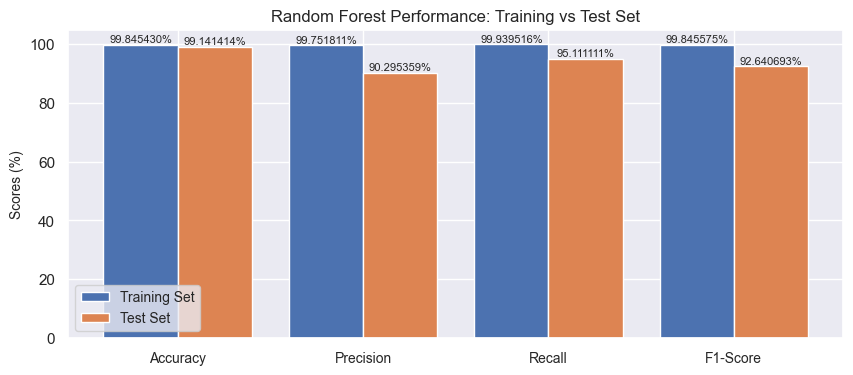

In [846]:
# Function to evaluate metrics for a dataset
def evaluate_metrics(model, X, y):
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, zero_division=1)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    
    return accuracy, precision, recall, f1

# Calculate metrics for training data
rf_train_accuracy, rf_train_precision, rf_train_recall, rf_train_f1 = evaluate_metrics(rf_model, X_train, y_train)

# Metrics for test data (already calculated)
rf_test_accuracy = rf_test_metrics['Accuracy']
rf_test_precision = rf_test_metrics['Precision']
rf_test_recall = rf_test_metrics['Recall']
rf_test_f1 = rf_test_metrics['F1-Score']

# Convert the metrics to percentages
train_scores = [rf_train_accuracy * 100, rf_train_precision * 100, rf_train_recall * 100, rf_train_f1 * 100]
test_scores = [rf_test_accuracy * 100, rf_test_precision * 100, rf_test_recall * 100, rf_test_f1 * 100]

# Labels for the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plotting the bar chart
x = range(len(metrics))
plt.figure(figsize=(10, 4))
bars_train = plt.bar(x, train_scores, width=0.4, label='Training Set', align='center')
bars_test = plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test Set', align='center')

# Adding values inside the bars with smaller font size
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.6f}%', ha='center', va='bottom', fontsize=8)

for bar in bars_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.6f}%', ha='center', va='bottom', fontsize=8)

# Adding labels and titles with smaller font size
plt.xticks([i + 0.2 for i in x], metrics, fontsize=10)
plt.ylabel('Scores (%)', fontsize=10)
plt.title('Random Forest Performance: Training vs Test Set', fontsize=12)
plt.legend(fontsize=10)

# Show the plot
plt.show()


## Logistic regression

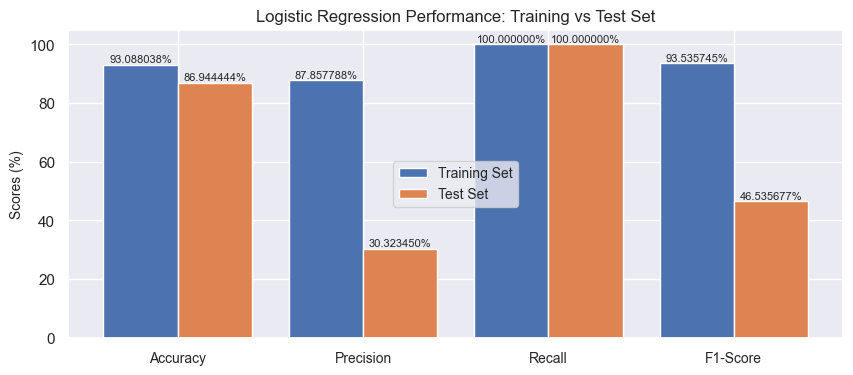

In [849]:
# Evaluate the Logistic Regression model on the test set
y_test_pred = lr_model.predict(X_test)

# Calculate evaluation metrics for the test set
lr_test_accuracy = accuracy_score(y_test, y_test_pred)
lr_test_precision = precision_score(y_test, y_test_pred, zero_division=1)
lr_test_recall = recall_score(y_test, y_test_pred)
lr_test_f1 = f1_score(y_test, y_test_pred)

# Calculate metrics for training data
lr_train_accuracy, lr_train_precision, lr_train_recall, lr_train_f1 = (
    sum(lr_accuracy_scores) / n_splits,
    sum(lr_precision_scores) / n_splits,
    sum(lr_recall_scores) / n_splits,
    sum(lr_f1_scores) / n_splits,
)

# Convert the metrics to percentages for the plot
train_scores = [lr_train_accuracy * 100, lr_train_precision * 100, lr_train_recall * 100, lr_train_f1 * 100]
test_scores = [lr_test_accuracy * 100, lr_test_precision * 100, lr_test_recall * 100, lr_test_f1 * 100]

# Labels for the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Plotting the bar chart
x = range(len(metrics))
plt.figure(figsize=(10, 4))
bars_train = plt.bar(x, train_scores, width=0.4, label='Training Set', align='center')
bars_test = plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test Set', align='center')

# Adding values inside the bars with smaller font size
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.6f}%', ha='center', va='bottom', fontsize=8)

for bar in bars_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.6f}%', ha='center', va='bottom', fontsize=8)

# Adding labels and titles with smaller font size
plt.xticks([i + 0.2 for i in x], metrics, fontsize=10)
plt.ylabel('Scores (%)', fontsize=10)
plt.title('Logistic Regression Performance: Training vs Test Set', fontsize=12)
plt.legend(fontsize=10)

# Show the plot
plt.show()


## Support Vector Machine

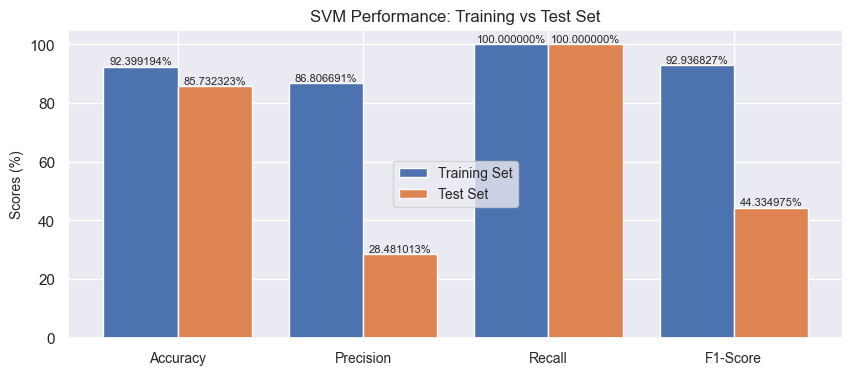

In [850]:
# Step 1: Evaluate the SVM model on the test set
y_test_pred = svm_model.predict(X_test)

# Step 2: Calculate evaluation metrics for the test set
svm_test_accuracy = accuracy_score(y_test, y_test_pred)
svm_test_precision = precision_score(y_test, y_test_pred, zero_division=1)
svm_test_recall = recall_score(y_test, y_test_pred)
svm_test_f1 = f1_score(y_test, y_test_pred)

# Step 3: Calculate the average performance metrics across training folds
svm_train_accuracy, svm_train_precision, svm_train_recall, svm_train_f1 = (
    sum(svm_accuracy_scores) / n_splits,
    sum(svm_precision_scores) / n_splits,
    sum(svm_recall_scores) / n_splits,
    sum(svm_f1_scores) / n_splits,
)

# Step 4: Convert the metrics to percentages for the plot
train_scores = [svm_train_accuracy * 100, svm_train_precision * 100, svm_train_recall * 100, svm_train_f1 * 100]
test_scores = [svm_test_accuracy * 100, svm_test_precision * 100, svm_test_recall * 100, svm_test_f1 * 100]

# Step 5: Labels for the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Step 6: Plotting the bar chart
x = range(len(metrics))
plt.figure(figsize=(10, 4))
bars_train = plt.bar(x, train_scores, width=0.4, label='Training Set', align='center')
bars_test = plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test Set', align='center')

# Step 7: Adding values inside the bars with smaller font size
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.6f}%', ha='center', va='bottom', fontsize=8)

for bar in bars_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.6f}%', ha='center', va='bottom', fontsize=8)

# Step 8: Adding labels and titles with smaller font size
plt.xticks([i + 0.2 for i in x], metrics, fontsize=10)
plt.ylabel('Scores (%)', fontsize=10)
plt.title('SVM Performance: Training vs Test Set', fontsize=12)
plt.legend(fontsize=10)

# Step 9: Show the plot
plt.show()


## KNN

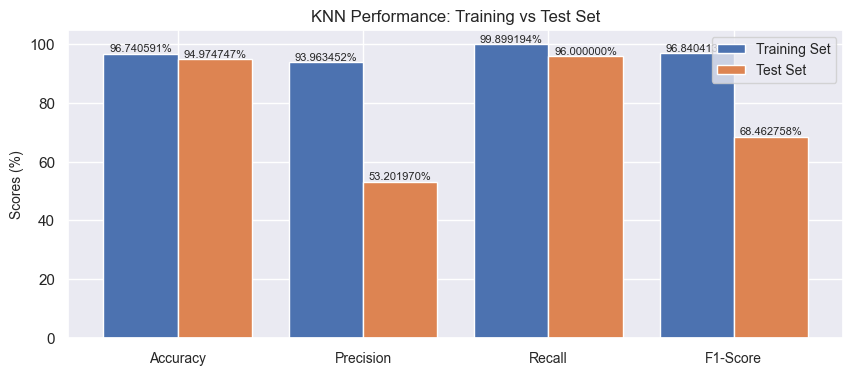

In [853]:
# Step 1: Evaluate the KNN model on the test set
y_test_pred = knn_model.predict(X_test)

# Step 2: Calculate evaluation metrics for the test set
knn_test_accuracy = accuracy_score(y_test, y_test_pred)
knn_test_precision = precision_score(y_test, y_test_pred, zero_division=1)
knn_test_recall = recall_score(y_test, y_test_pred)
knn_test_f1 = f1_score(y_test, y_test_pred)

# Step 3: Calculate the average performance metrics across training folds
knn_train_accuracy, knn_train_precision, knn_train_recall, knn_train_f1 = (
    sum(knn_accuracy_scores) / n_splits,
    sum(knn_precision_scores) / n_splits,
    sum(knn_recall_scores) / n_splits,
    sum(knn_f1_scores) / n_splits,
)

# Step 4: Convert the metrics to percentages for the plot
train_scores = [knn_train_accuracy * 100, knn_train_precision * 100, knn_train_recall * 100, knn_train_f1 * 100]
test_scores = [knn_test_accuracy * 100, knn_test_precision * 100, knn_test_recall * 100, knn_test_f1 * 100]

# Step 5: Labels for the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Step 6: Plotting the bar chart
x = range(len(metrics))
plt.figure(figsize=(10, 4))
bars_train = plt.bar(x, train_scores, width=0.4, label='Training Set', align='center')
bars_test = plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label='Test Set', align='center')

# Step 7: Adding values inside the bars with smaller font size
for bar in bars_train:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.6f}%', ha='center', va='bottom', fontsize=8)

for bar in bars_test:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, yval, f'{yval:.6f}%', ha='center', va='bottom', fontsize=8)

# Step 8: Adding labels and titles with smaller font size
plt.xticks([i + 0.2 for i in x], metrics, fontsize=10)
plt.ylabel('Scores (%)', fontsize=10)
plt.title('KNN Performance: Training vs Test Set', fontsize=12)
plt.legend(fontsize=10)

# Step 9: Show the plot
plt.show()


## Final evaluation

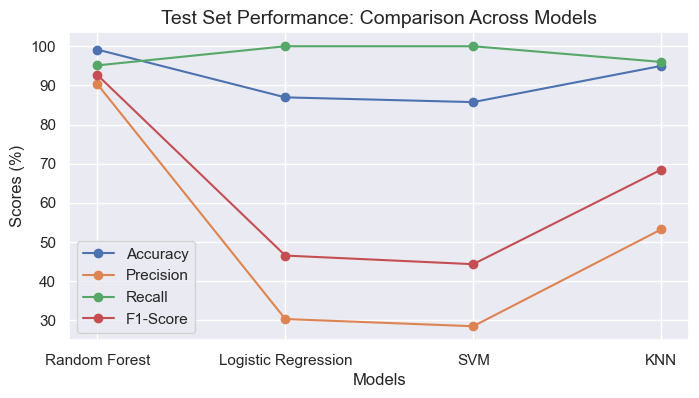

In [856]:
# Names of the models
models = ['Random Forest', 'Logistic Regression', 'SVM', 'KNN']

# Test set performance metrics (replace these with actual values)
# Each metric's test performance for each model
accuracy_scores = [rf_test_accuracy * 100, lr_test_accuracy * 100, svm_test_accuracy * 100, knn_test_accuracy * 100]
precision_scores = [rf_test_precision * 100, lr_test_precision * 100, svm_test_precision * 100, knn_test_precision * 100]
recall_scores = [rf_test_recall * 100, lr_test_recall * 100, svm_test_recall * 100, knn_test_recall * 100]
f1_scores = [rf_test_f1 * 100, lr_test_f1 * 100, svm_test_f1 * 100, knn_test_f1 * 100]

# Plotting the line graph for each metric
plt.figure(figsize=(8, 4))

# Plot lines for each metric
plt.plot(models, accuracy_scores, marker='o', label='Accuracy')
plt.plot(models, precision_scores, marker='o', label='Precision')
plt.plot(models, recall_scores, marker='o', label='Recall')
plt.plot(models, f1_scores, marker='o', label='F1-Score')

# Adding labels and title
plt.xlabel('Models', fontsize=12)
plt.ylabel('Scores (%)', fontsize=12)
plt.title('Test Set Performance: Comparison Across Models', fontsize=14)

# Adding a legend
plt.legend()

# Show the plot
plt.show()
